# Avacado_Project :- Evaluation_Project_2

### Submitted by: Vinayak Patil

### Problem Statement:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g.greenskins) are not included in this table.
Some relevant columns in the dataset:
    
 1. Date - The date of the observation
 2. AveragePrice - the average price of a single avocado
 3. type - conventional or organic
 4. year - the year
 5. Region - the city or region of the observation
 6. Total Volume - Total number of avocados sold
 7. 4046 - Total number of avocados with PLU 4046 sold
 8. 4225 - Total number of avocados with PLU 4225 sold
 9. 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. Downlaod Files: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Import data from github and start the preprocessing steps:

In [46]:
# import data and check 6 different samples

data = pd.read_csv('avocado.csv')
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [47]:
# checking shapes

data.shape

(18249, 14)

#### Observations:

This Dataset has 18249 rows and 14 columns. Let's study the column's names and their charectaristics.

In [48]:
# checking columns names

data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Observation:

Here, 'Unnamed: 0' is not necessary.So let's remove it parmanently.

In [49]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [50]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [51]:
# checking shapes

data.shape

(18249, 13)

#### Observations:

Now the new dataset has 18249 rows and 13 columns.

But here Date is in dd-mm-yyyy format. Need to convert this in datetime format which is yyyy-mm-dd

### Date Datatype:

In [52]:
data['Date'].dtype

dtype('O')

In [53]:
data1= data.copy()

In [54]:
data[["day", "month", "year1"]] = data["Date"].str.split("-", expand = True)

In [55]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region   day month year1  
0  Albany  2015    12    27  
1  Albany  2015    12    20  
2  Albany  2015    12    13  
3  Albany  2015    12    06  
4  Albany  2015    11    29

In [56]:
data.drop(['Date','year1'],axis=1, inplace= True)
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region   day month  
0     8603.62       93.25          0.0  conventional  2015  Albany  2015    12  
1     9408.07       97.49          0.0  conventional  2015  Albany  2015    12  
2     8042.21      103.14          0.0  conventional  2015  Albany  2015    12  
3     5677.40      133.76          0.0  conventional  2015  Albany  2015    12  
4     5986.26      197.69          0.0  conventional  2015  Albany  2015    11

#### Observations:

Date is converted into day month and year column

In [57]:
# Checking column name
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'day', 'month'],
      dtype='object')

In [58]:
# renaming column

data.columns= ['AveragePrice', 'Total_Volume', 'd4046', 'd4225', 'd4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region','day', 'month']
data.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags          type  year  region   day month  
0     8603.62       93.25          0.0  conventional  2015  Albany  2015    12  
1     9408.07       97.49          0.0  conventional  2015  Albany  2015    12  
2     8042.21      103.14          0.0  conventional  2015  Albany  2015    12  
3     5677.40      133.76          0.0  conventional  2015  Albany  2015    12  
4     5986.26      197.69          0.0  conventional  2015  Albany  2015    11

### Checking Null:

In [59]:
#checking null values

null_val= data.isna().sum()

In [60]:
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l , axis =1, keys =['Null Values', 'Null Values percentage']))

missing value details 

               Null Values  Null Values percentage
AveragePrice            0                     0.0
Total_Volume            0                     0.0
d4046                   0                     0.0
d4225                   0                     0.0
d4770                   0                     0.0
Total_Bags              0                     0.0
Small_Bags              0                     0.0
Large_Bags              0                     0.0
XLarge_Bags             0                     0.0
type                    0                     0.0
year                    0                     0.0
region                  0                     0.0
day                     0                     0.0
month                   0                     0.0


<AxesSubplot:>

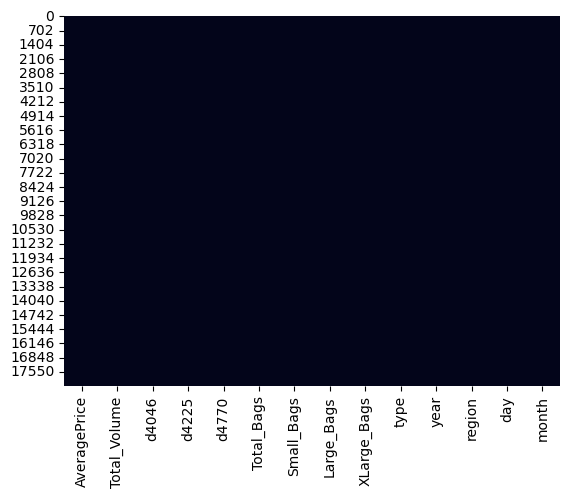

In [61]:
sns.heatmap(data.isnull(),cbar=False)

#### Observations:

No null values are present in the total dataset.

### Checking duplicate:

In [62]:
#checking duplicate

data.duplicated().sum()

0

#### Observations:

No duplicate rows are present in the dataset.

### Checking different statistical parameter:

In [64]:
data.describe().round(2)

AveragePrice  Total_Volume        d4046        d4225       d4770  \
count      18249.00      18249.00     18249.00     18249.00    18249.00   
mean           1.41     850644.01    293008.42    295154.57    22839.74   
std            0.40    3453545.36   1264989.08   1204120.40   107464.07   
min            0.44         84.56         0.00         0.00        0.00   
25%            1.10      10838.58       854.07      3008.78        0.00   
50%            1.37     107376.76      8645.30     29061.02      184.99   
75%            1.66     432962.29    111020.20    150206.86     6243.42   
max            3.25   62505646.52  22743616.17  20470572.61  2546439.11   

        Total_Bags   Small_Bags  Large_Bags  XLarge_Bags      year  
count     18249.00     18249.00    18249.00     18249.00  18249.00  
mean     239639.20    182194.69    54338.09      3106.43   2016.15  
std      986242.40    746178.51   243965.96     17692.89      0.94  
min           0.00         0.00        0.00         0.00   2015.00  
25%        5088.64      2849.42      127.47         0.00   2015.00  
50%       39743.83     26362.82     2647.71         0.00   2016.00  
75%      110783.37     83337.67    22029.25       132.50   2017.00  
max    19373134.37  13384586.80  5719096.61    551693.65   2018.00

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   d4046         18249 non-null  float64
 3   d4225         18249 non-null  float64
 4   d4770         18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  day           18249 non-null  object 
 13  month         18249 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [66]:
data.nunique()

AveragePrice      259
Total_Volume    18237
d4046           17702
d4225           18103
d4770           12071
Total_Bags      18097
Small_Bags      17321
Large_Bags      15082
XLarge_Bags      5588
type                2
year                4
region             54
day                 4
month              12
dtype: int64

#### Observations:

1. No null values are present.
2. Target variable is 'AveragePrice' and it is a float64 datatype. So it is a Regression problem.
3. Seems outliers are present in the overall dataset because most of the features has a difference between 75% percentile and max value.
4. 'type', 'day','month' and 'region' are object datatype. type has 2 categories ,region has 54 categories, day and month has 31 and 12 categories respectively.
5. 'year' is int64 datatype and it also has 4 differet categories.
6. Other variable are float64 datatypes.
7. The minimum value of d4046, d4225, d4770, Total_Bags, Small_Bags, Large_Bags, XLarge_Bags features is 0.(Need to impute this with proper data)
8. Most of the column , the value of std is greater than mean.
9. the new dataset have 14 columns.

### Exploration of Categorical data:-

Checking different unique values for categorical features

### 1. type:

In [67]:
data["type"]. unique()

array(['conventional', 'organic'], dtype=object)

In [68]:
data["type"]. value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

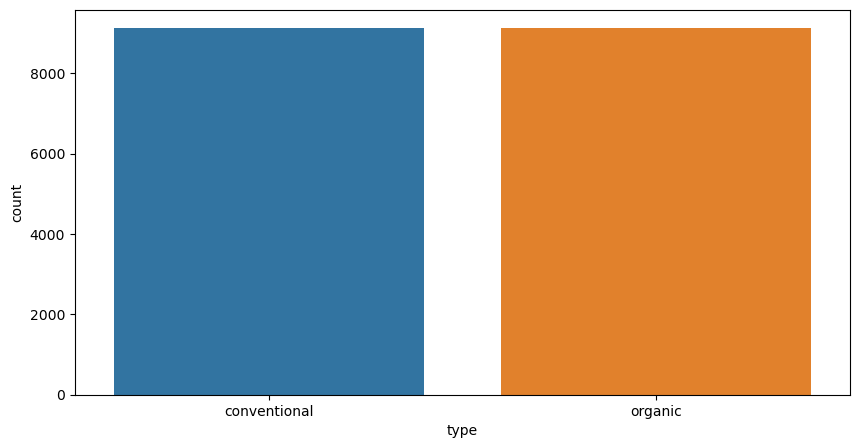

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(data['type'])
plt.show()

In [70]:
data.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

#### Observations:

type has two groups and the mean of target (AveragePrice) with respect to organic is greater than other.

### 2. region:

In [71]:
data["region"]. unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [72]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

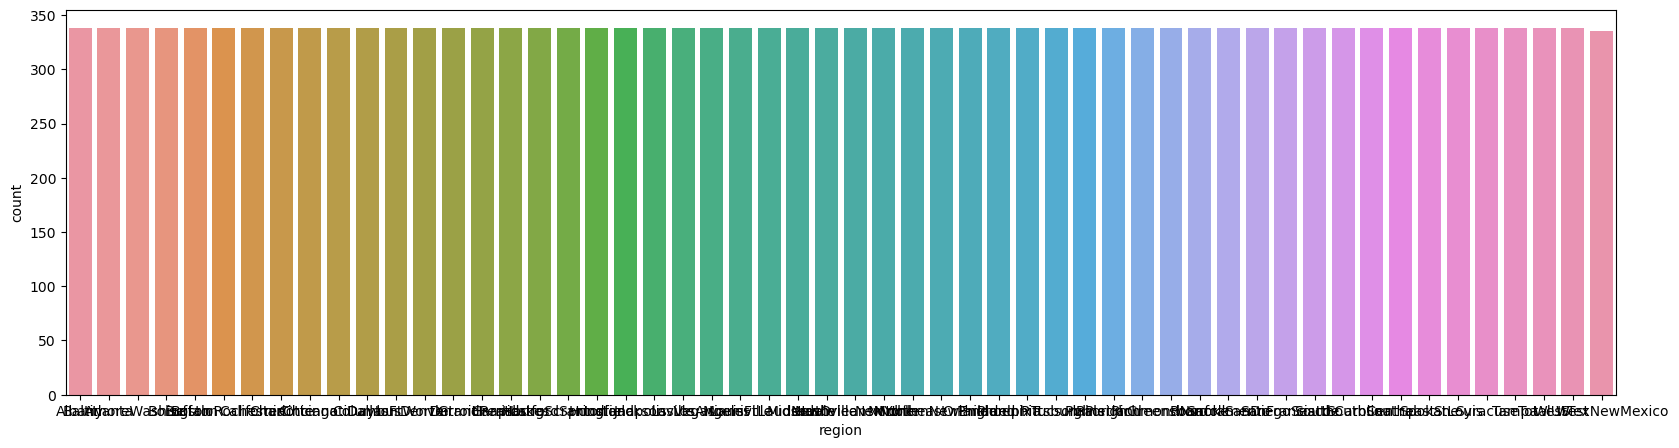

In [73]:
plt.figure(figsize=(20,5))
sns.countplot(data['region'])
plt.show()

#### Observations:

Here all 54 regions are same value counts. the dataset is not imbalanced with respect to region.

### Exploration of Numarical data:-

### 1. For discrete datatype(year) :-

In [74]:
data["year"]. unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [75]:
data["year"]. value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

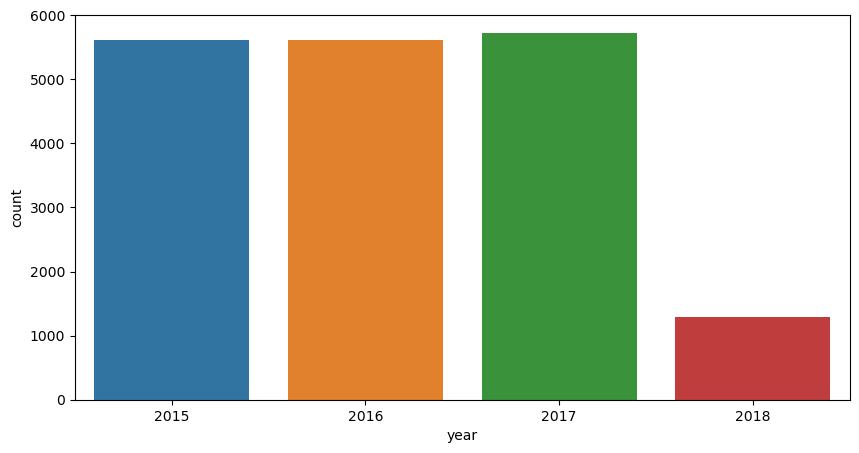

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(data['year'])
plt.show()

In [77]:
data.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

#### Observations:

There are 4 different types of 'year'. 2018 has the lowest value count.

The mean of target (AveragePrice) with respect to year 2017 is greater than others.

### Exploration of day and months:-

In [88]:
data["day"]. value_counts().sort_index(ascending=True)

2015    5615
2016    5616
2017    5722
2018    1296
Name: day, dtype: int64

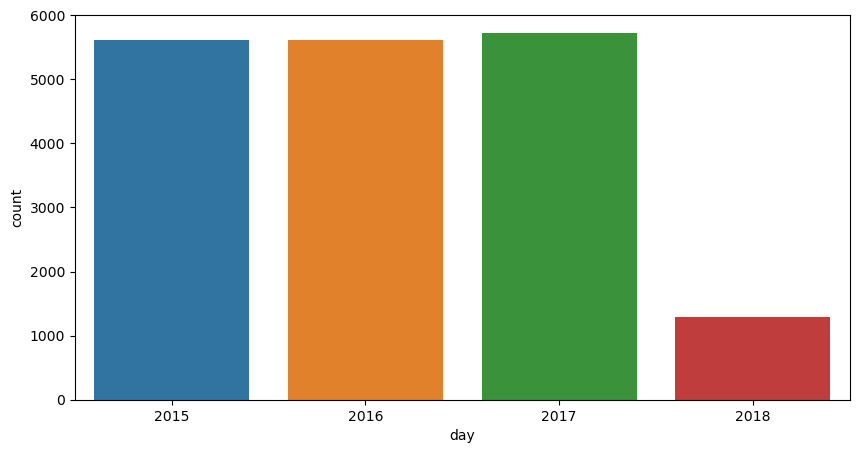

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(data['day'])
plt.show()

In [90]:
data["month"]. value_counts().sort_index(ascending=True)

01    1944
02    1728
03    1836
04    1404
05    1512
06    1294
07    1512
08    1404
09    1296
10    1512
11    1404
12    1403
Name: month, dtype: int64

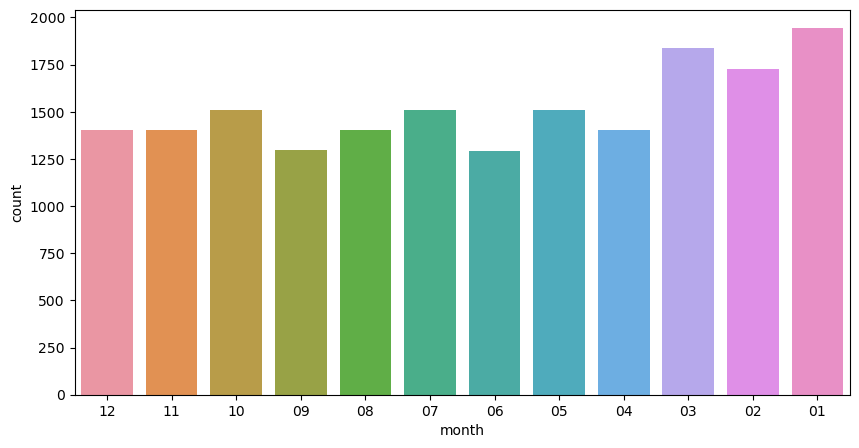

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(data['month'])
plt.show()

#### Observations:

1. day has 31 values and the count range is 400-600
2. month has 12 values and the count range is 1250-1750
3. The sale is high for 1st, 2nd and 3rd and comparively low for 8th, 9th and 6th months.

### Exploration of target variable:

In [92]:
data.AveragePrice.min()

0.44

In [93]:
data.AveragePrice.max()

3.25

In [94]:
data.AveragePrice.mean()

1.4059784097758825

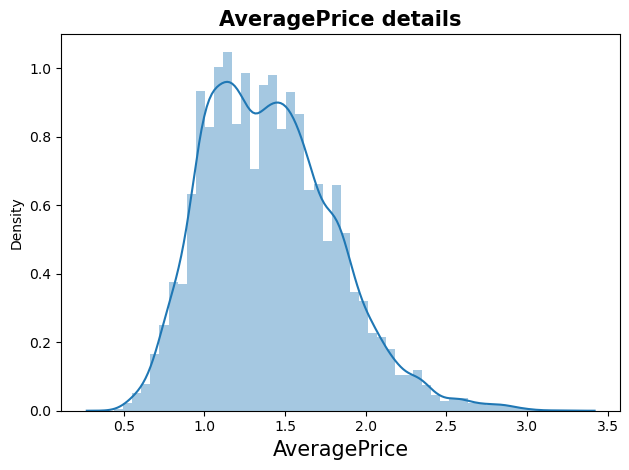

In [95]:
sns.distplot(data.AveragePrice)
plt. title('AveragePrice details',fontsize= 15, fontweight='bold')

plt. xlabel('AveragePrice', fontsize= 15)
plt.tight_layout()
plt.show()

#### Observations:

AveragePrice is target and it is a right skewed data.

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

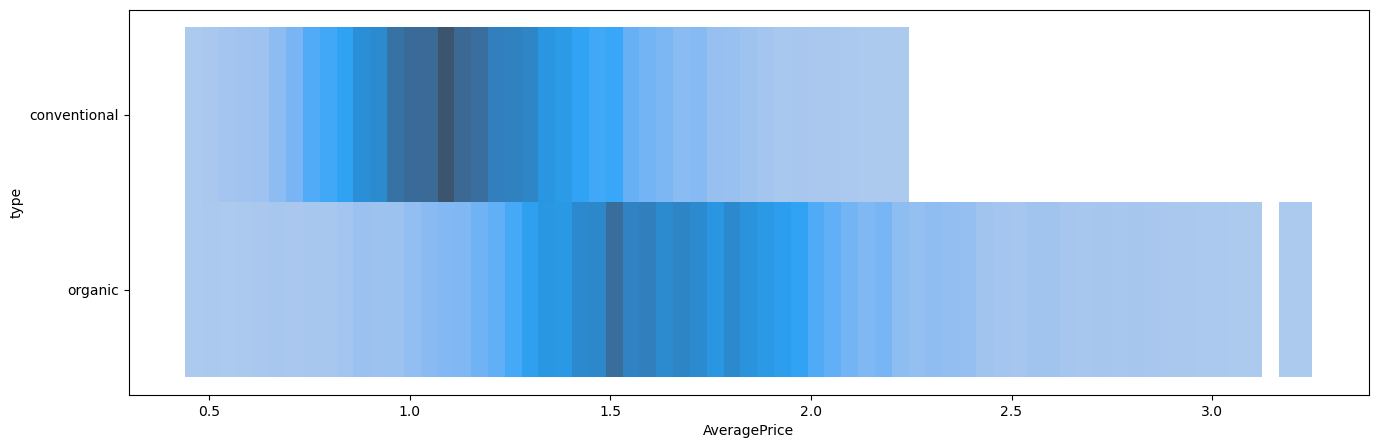

In [96]:
plt.figure(figsize=(16,5))
sns.histplot(y="type", x="AveragePrice", data=data)

#### Observations:

Outliers are present in both types of avocado.

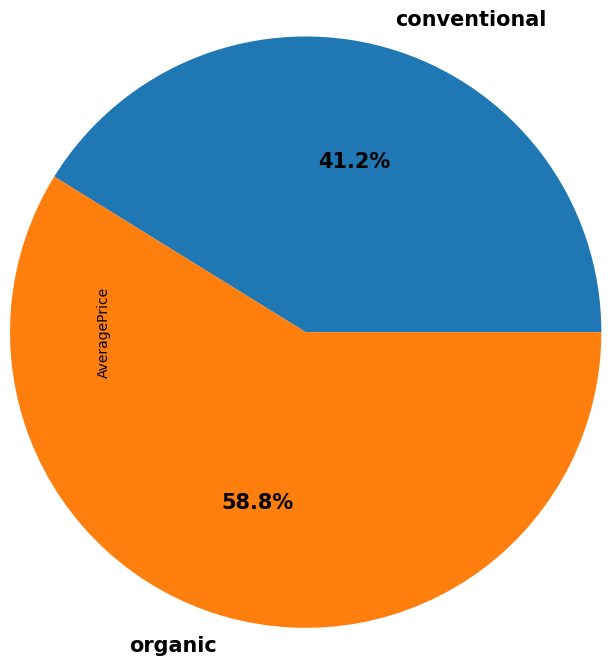

In [97]:
data.groupby('type')['AveragePrice'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

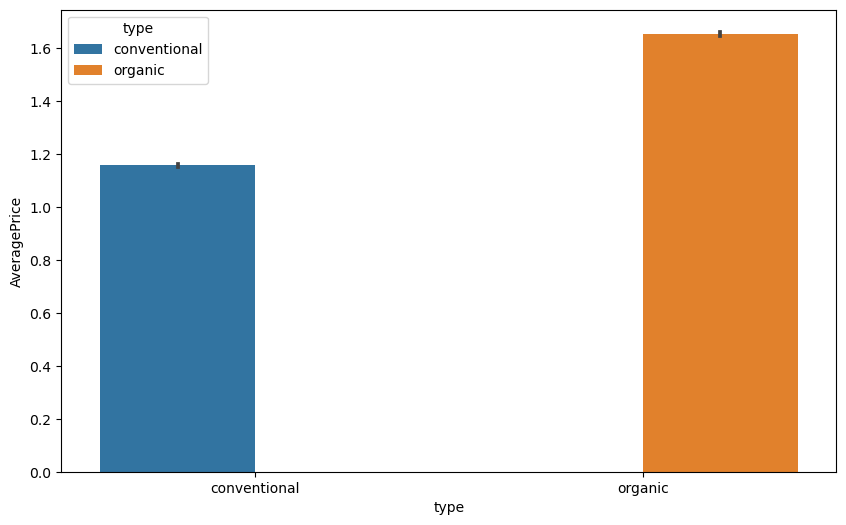

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x='type', y='AveragePrice', hue='type',data=data)
plt.show()

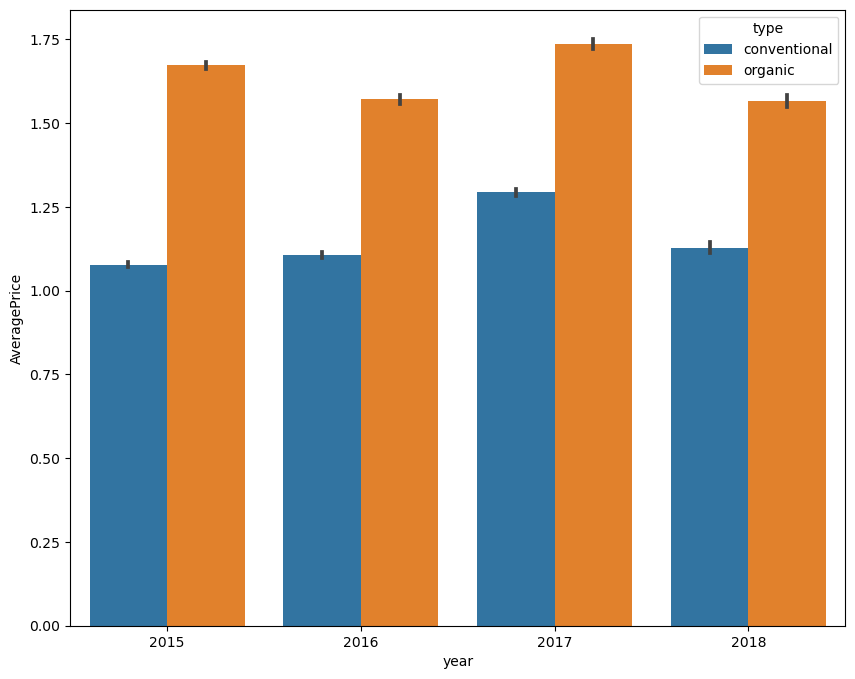

In [99]:
plt.figure(figsize=(10,8))
sns.barplot(x='year', y='AveragePrice', hue='type',data=data)
plt.show()

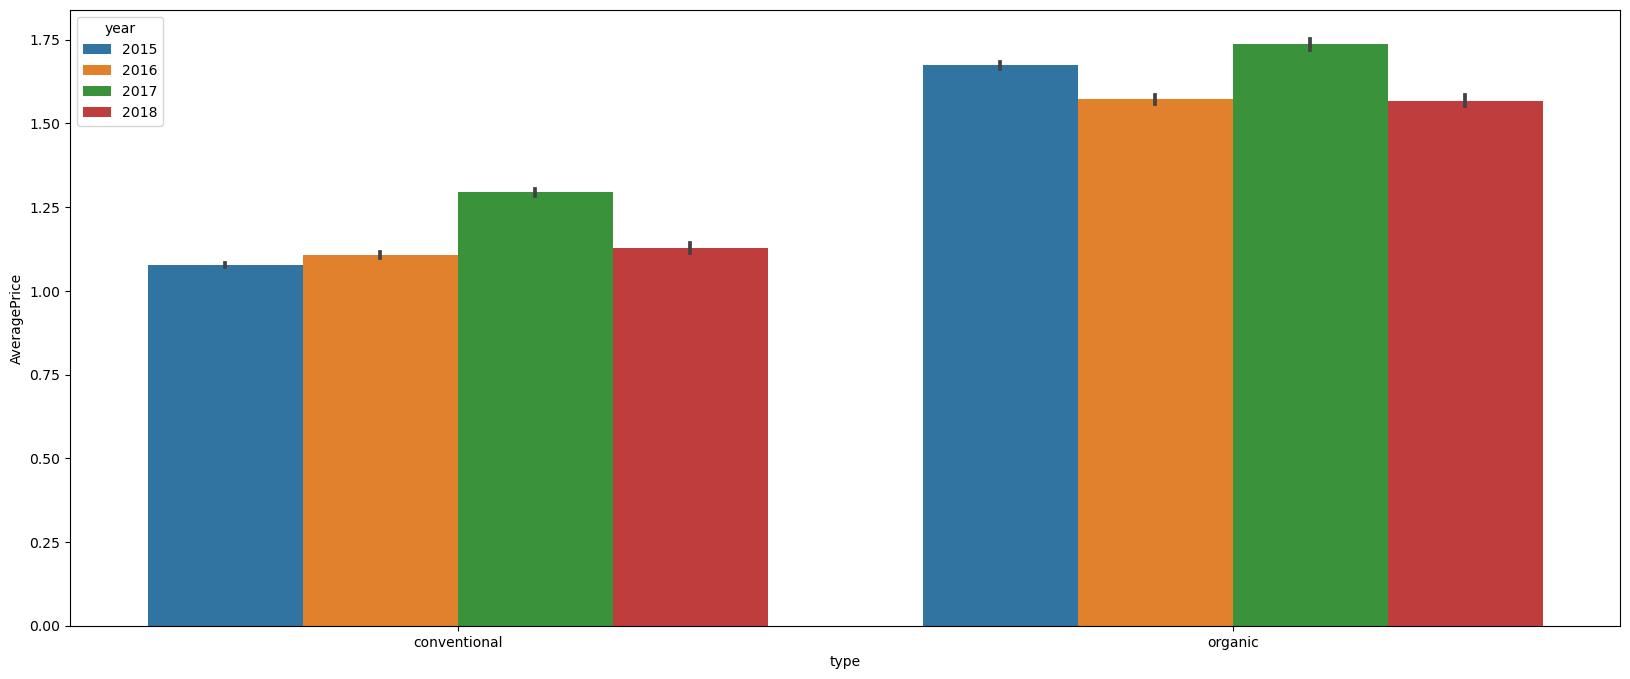

In [100]:
plt.figure(figsize=(20,8))
sns.barplot(x='type', y='AveragePrice', hue='year',data=data)
plt.show()

#### Observations:

AveragePrice of organic is greater than conventional in every year.

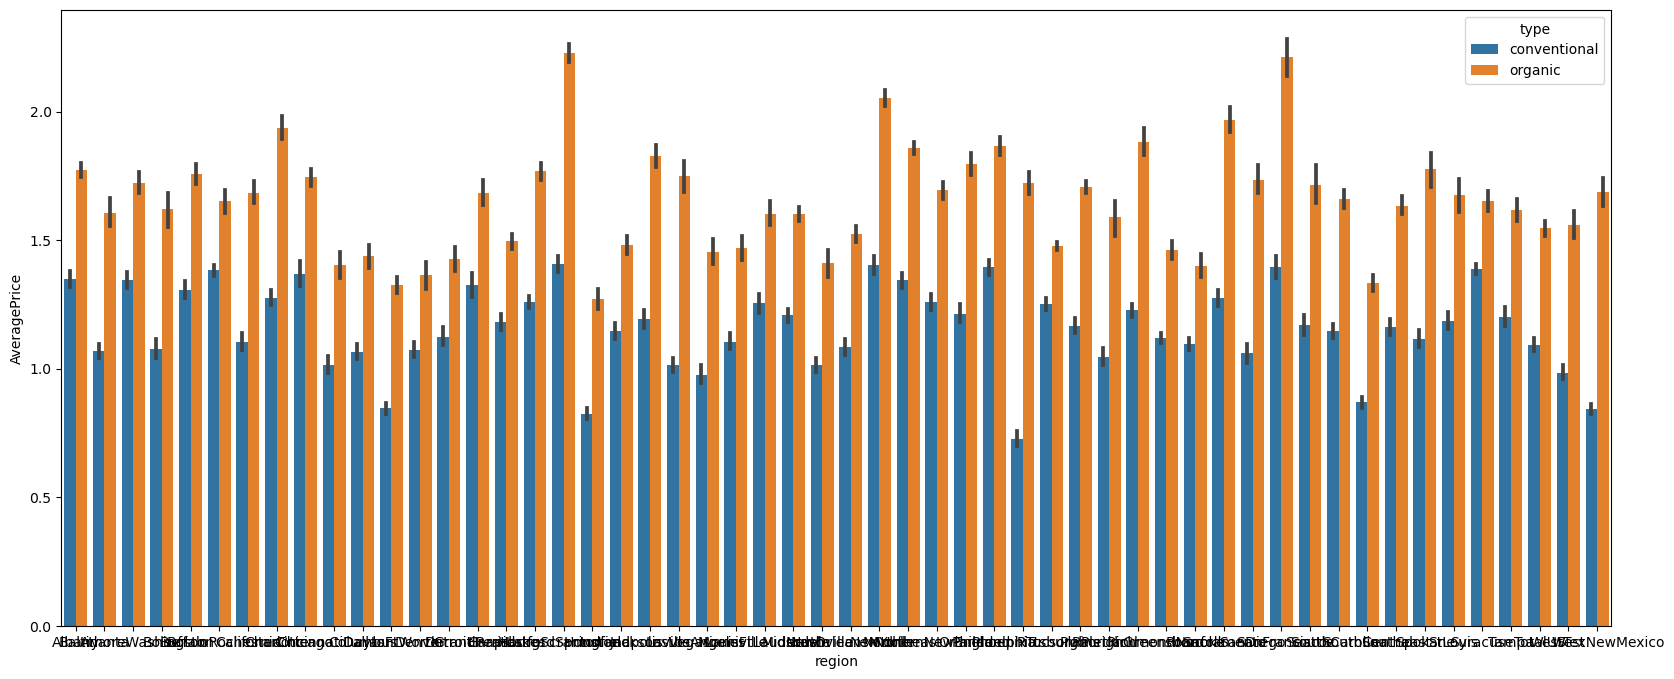

In [101]:
plt.figure(figsize=(20,8))
sns.barplot(x='region', y='AveragePrice', hue='type',data=data)
plt.show()

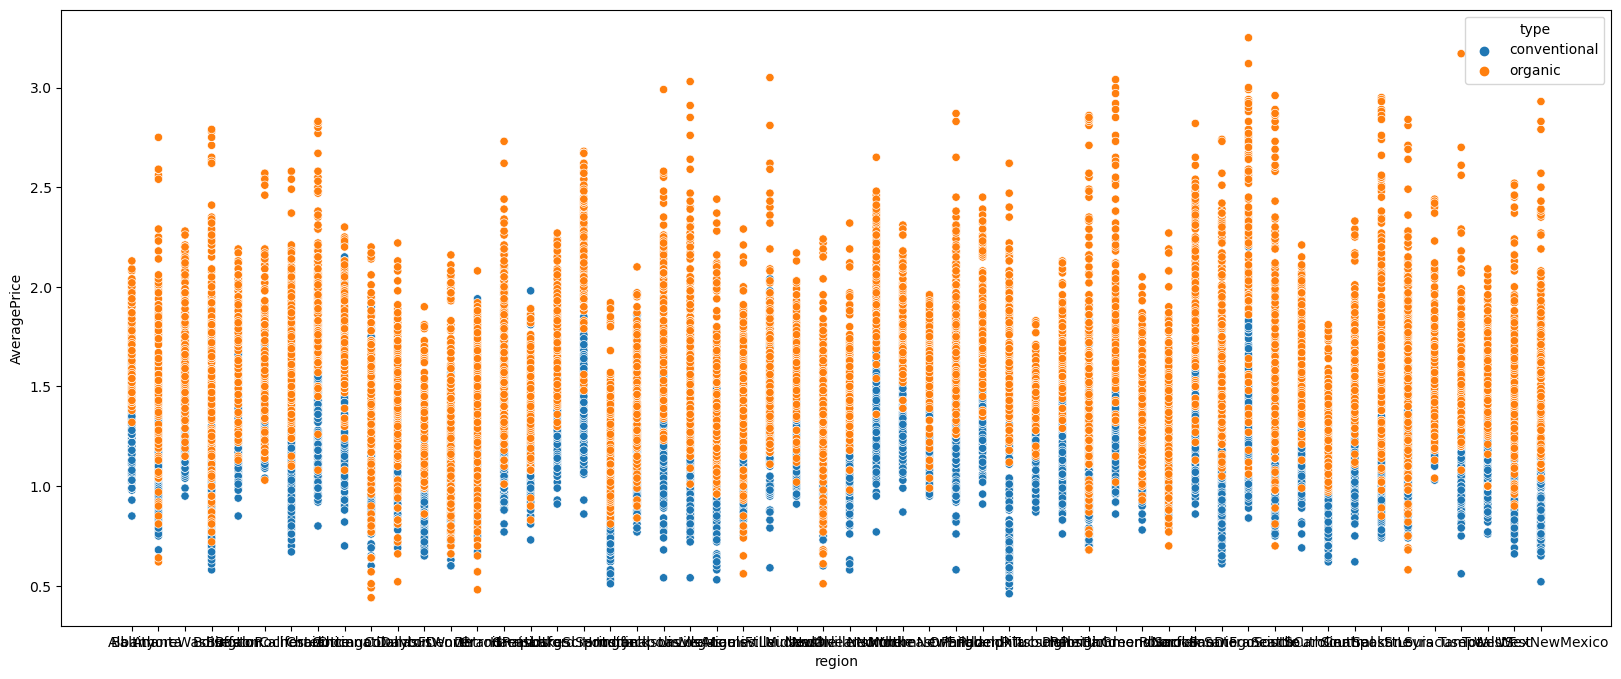

In [102]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='region', y='AveragePrice', hue='type',data=data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

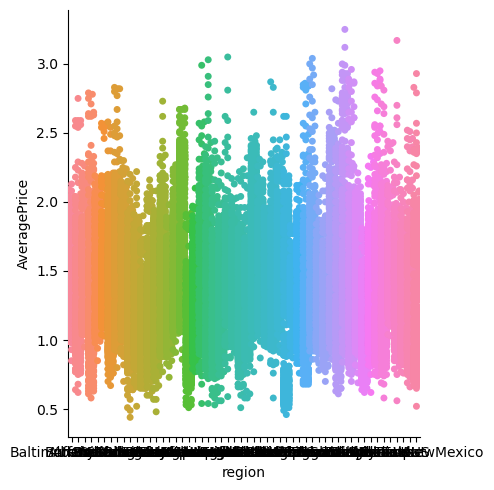

In [103]:
plt.figure(figsize=(20,10))
sns.catplot(x = "region", y = "AveragePrice", kind ='swarm', data=data)
plt.show()

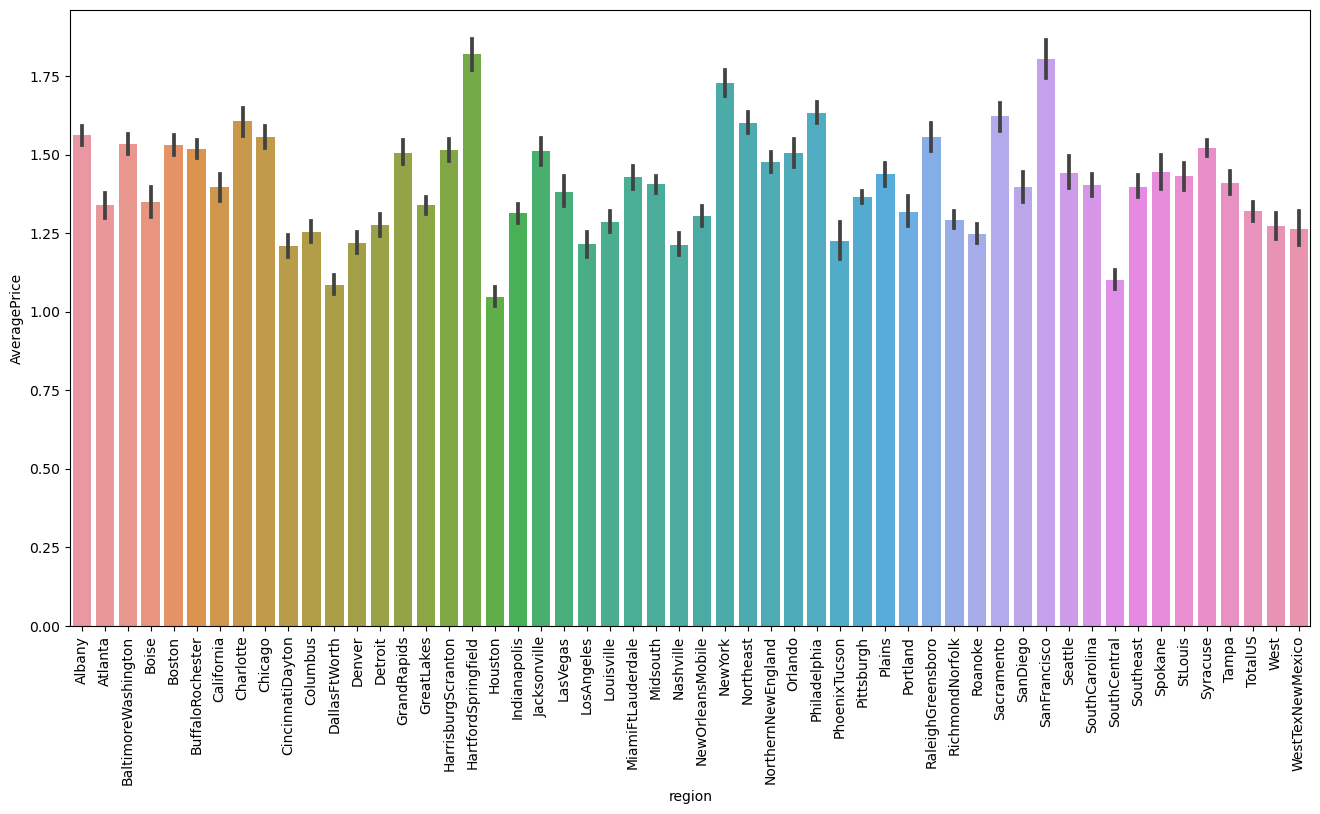

In [104]:
plt.figure(figsize=(16,8))
sns.barplot(x=data['region'],y=data['AveragePrice'], data=data)
plt.xticks(rotation=90)
plt.show()

#### Observations:

For every region the avg price of organic is greater than conventional

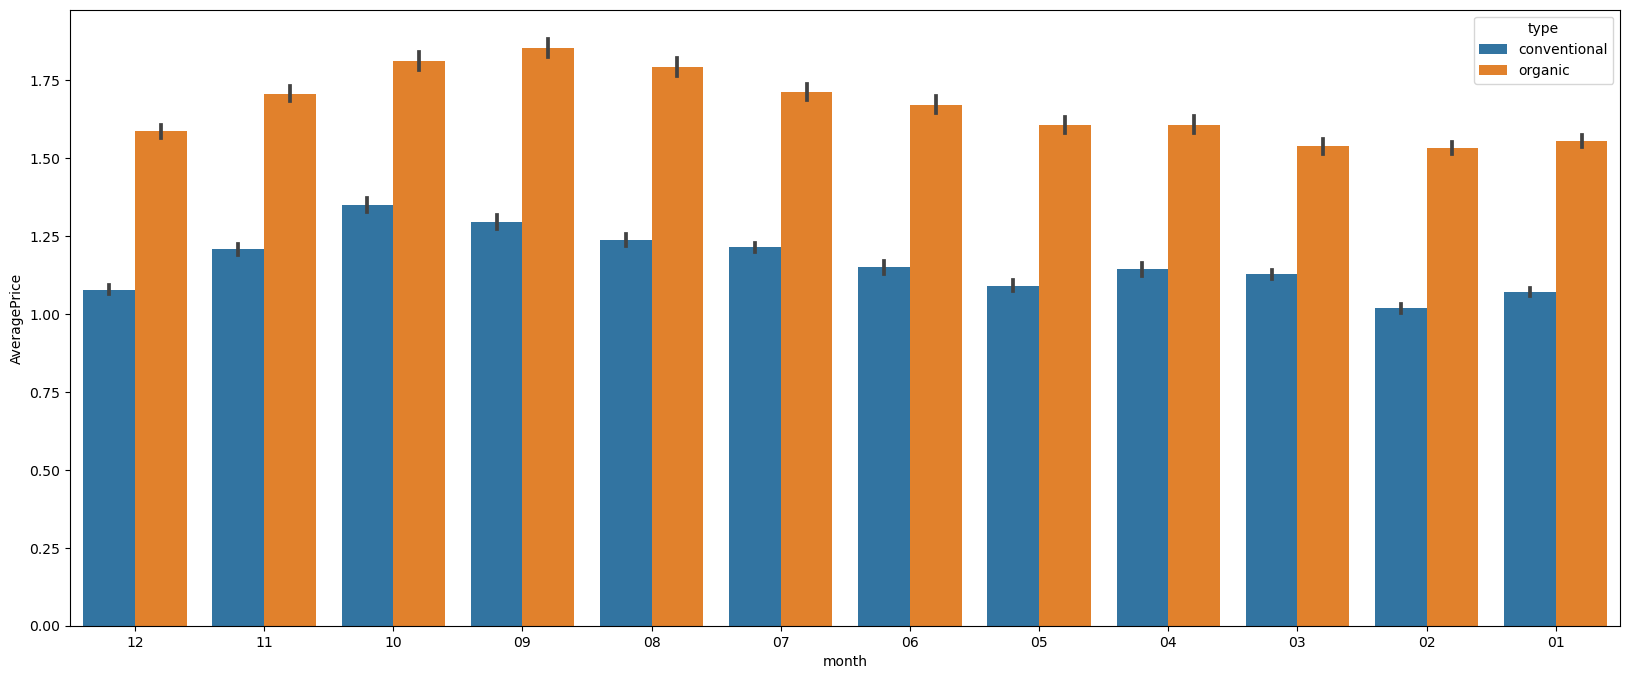

In [105]:
plt.figure(figsize=(20,8))
sns.barplot(x='month', y='AveragePrice', hue='type',data=data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

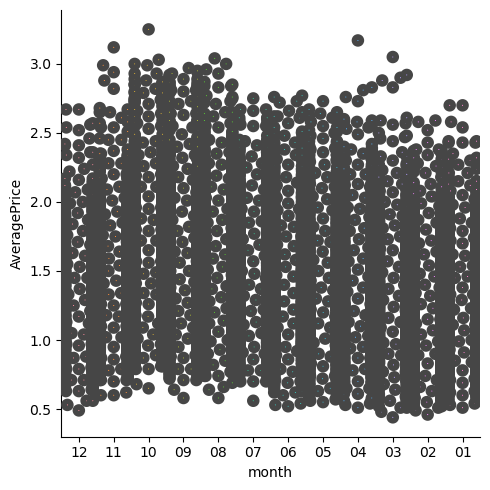

In [106]:
plt.figure(figsize=(20,10))
sns.catplot(x = "month", y = "AveragePrice", kind ='swarm', data=data, linewidth=4)
plt.show()

<Figure size 2000x1000 with 0 Axes>

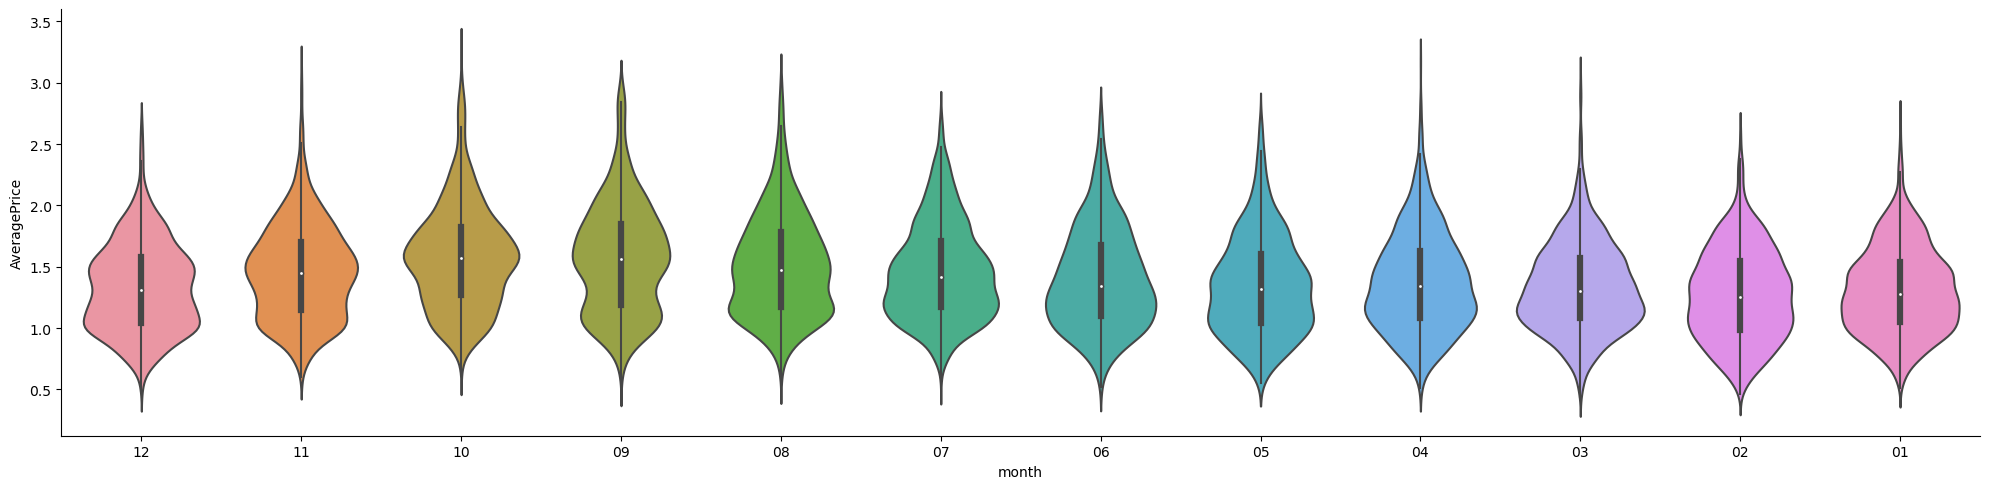

In [107]:
plt.figure(figsize=(20,10))
sns.catplot(x = "month", y = "AveragePrice", kind ='violin', data=data, aspect=4)
plt.show()

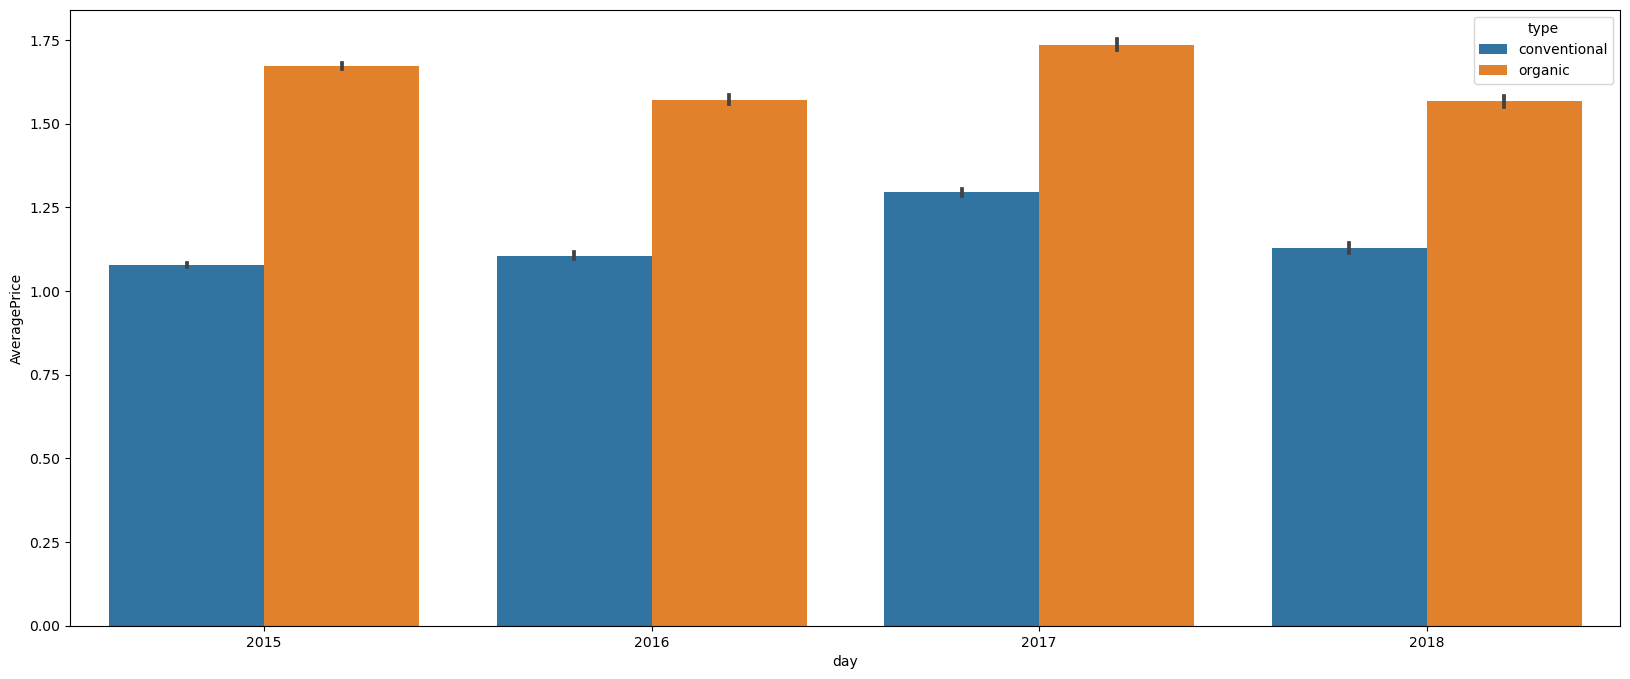

In [108]:
plt.figure(figsize=(20,8))
sns.barplot(x='day', y='AveragePrice', hue='type',data=data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

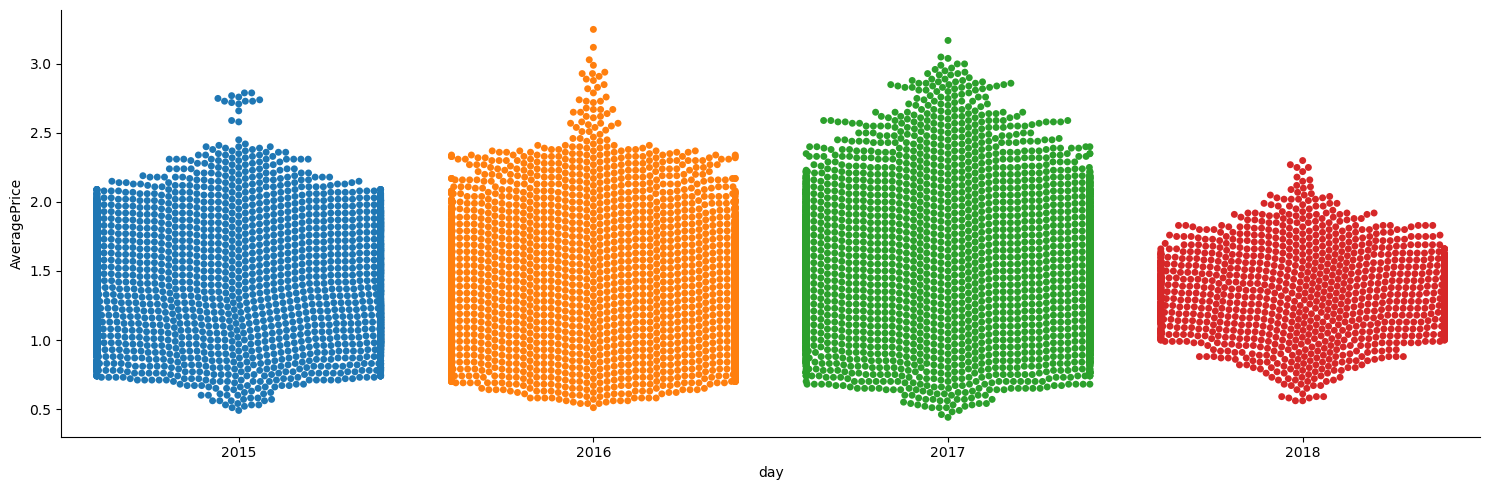

In [109]:
plt.figure(figsize=(20,10))
sns.catplot(x = "day", y = "AveragePrice", kind ='swarm', data=data, aspect=3)
plt.show()

<Figure size 2000x1000 with 0 Axes>

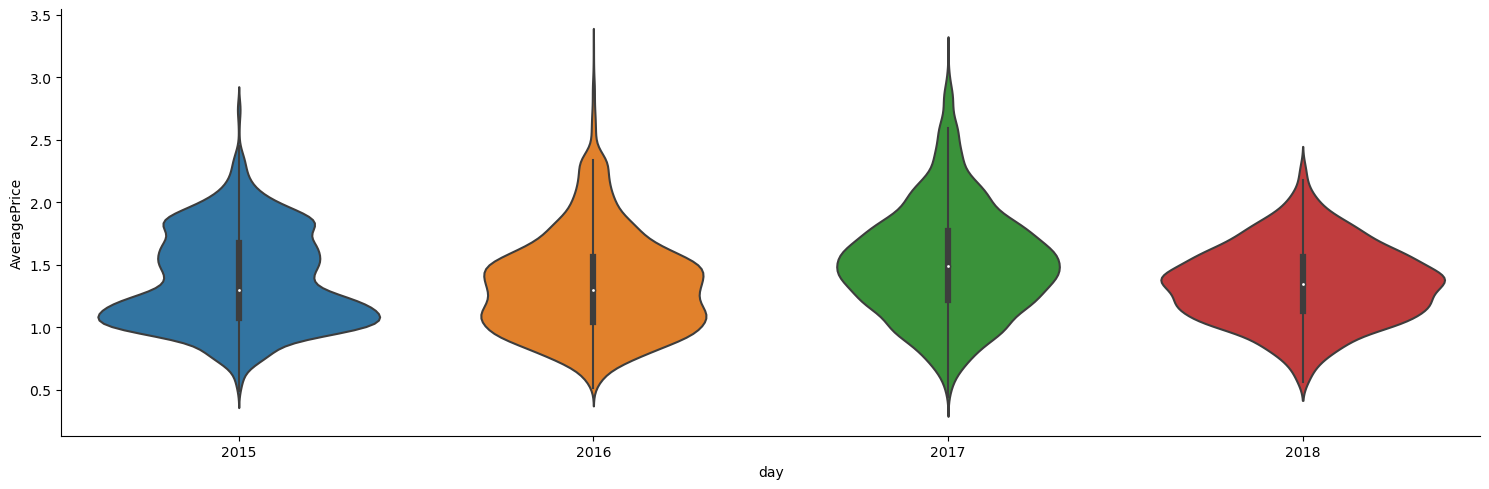

In [110]:
plt.figure(figsize=(20,10))
sns.catplot(x = "day", y = "AveragePrice", kind ='violin', data=data, aspect=3)
plt.show()

#### Observations:

1. For every month the sell of conventional avocado is greater than organic.
2. For 8th, 9th and 10th month the price is high and in this time the sales are minimum.
3. For 1st, 2nd and 3rd month the price is low and in this time the sales are maximum.
4. For every day also, the sell of conventional avocado is greater than organic.

### Analysis of another features:

<AxesSubplot:xlabel='Total_Volume', ylabel='type'>

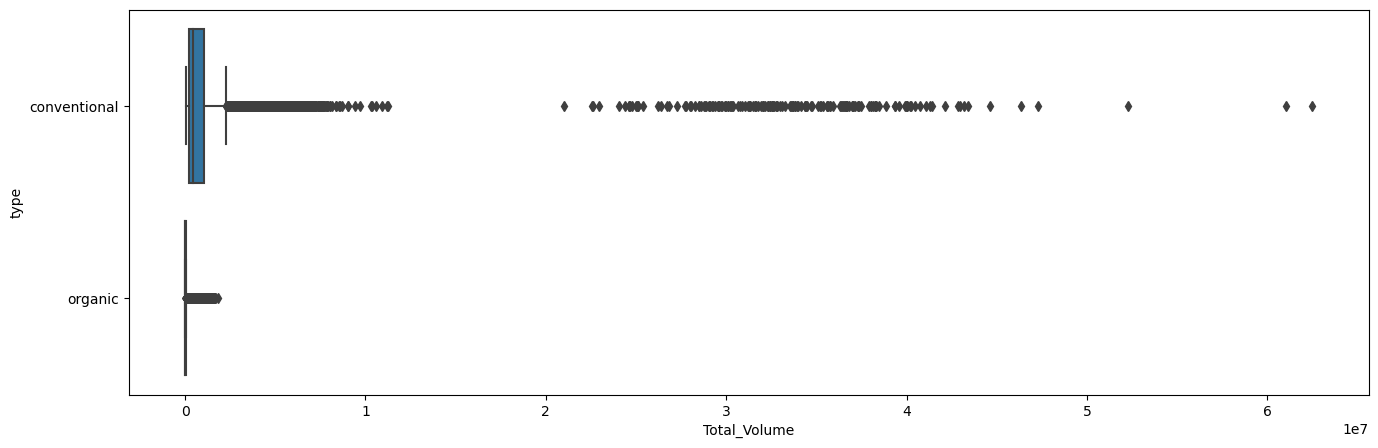

In [111]:
plt.figure(figsize=(16,5))
sns.boxplot(y="type", x="Total_Volume", data=data)

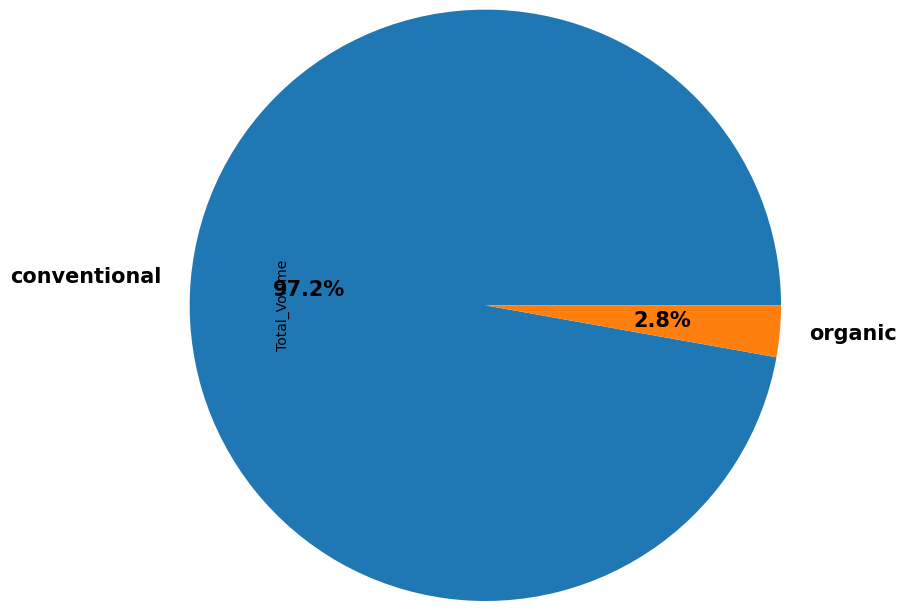

In [112]:
data.groupby('type')['Total_Volume'].mean().plot.pie(radius =2, textprops ={'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

#### Observations:

1. 97% are conventional avocado.The volume of conventional is greater for every region wise data.
2. outliers are present in both types of avocado data

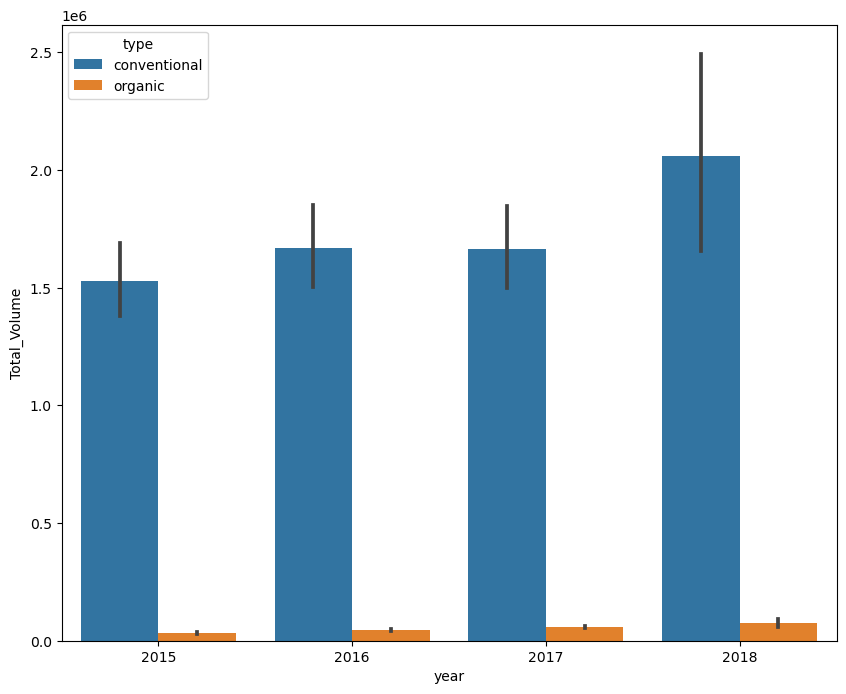

In [113]:
plt.figure(figsize=(10,8))
sns.barplot(x='year', y='Total_Volume', hue='type',data=data)
plt.show()

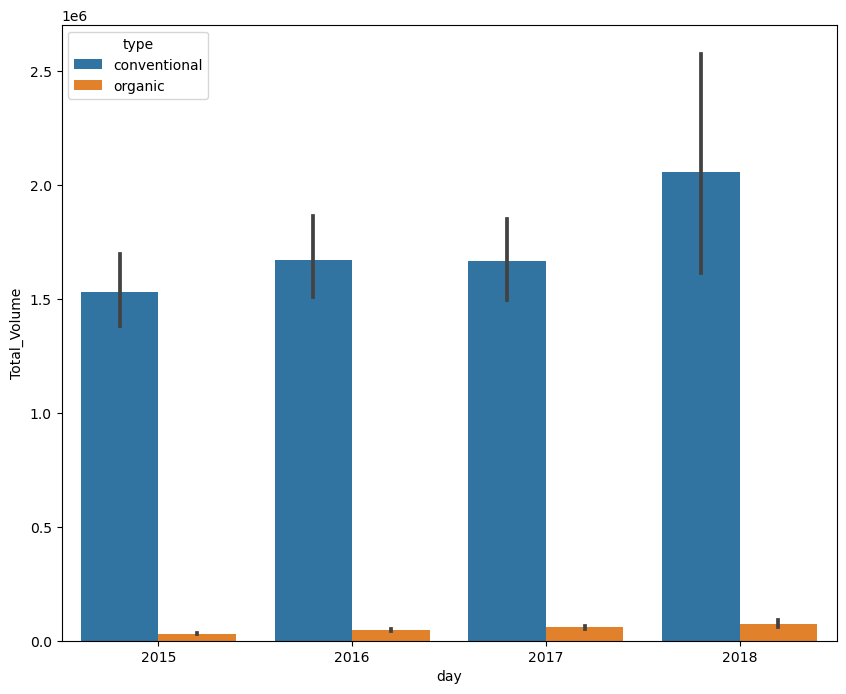

In [114]:
plt.figure(figsize=(10,8))
sns.barplot(x='day', y='Total_Volume', hue='type',data=data)
plt.show()

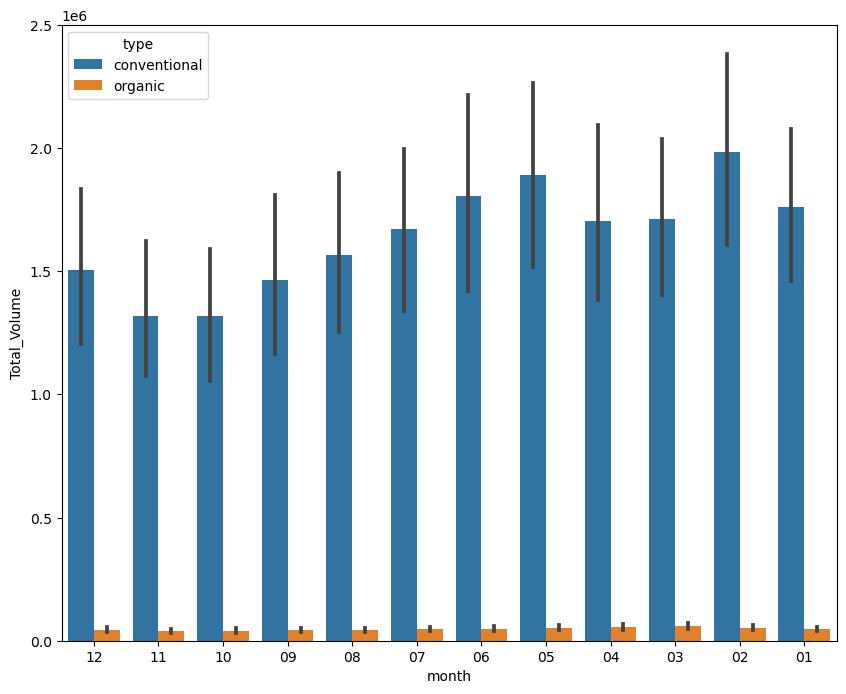

In [115]:
plt.figure(figsize=(10,8))
sns.barplot(x='month', y='Total_Volume', hue='type',data=data)
plt.show()

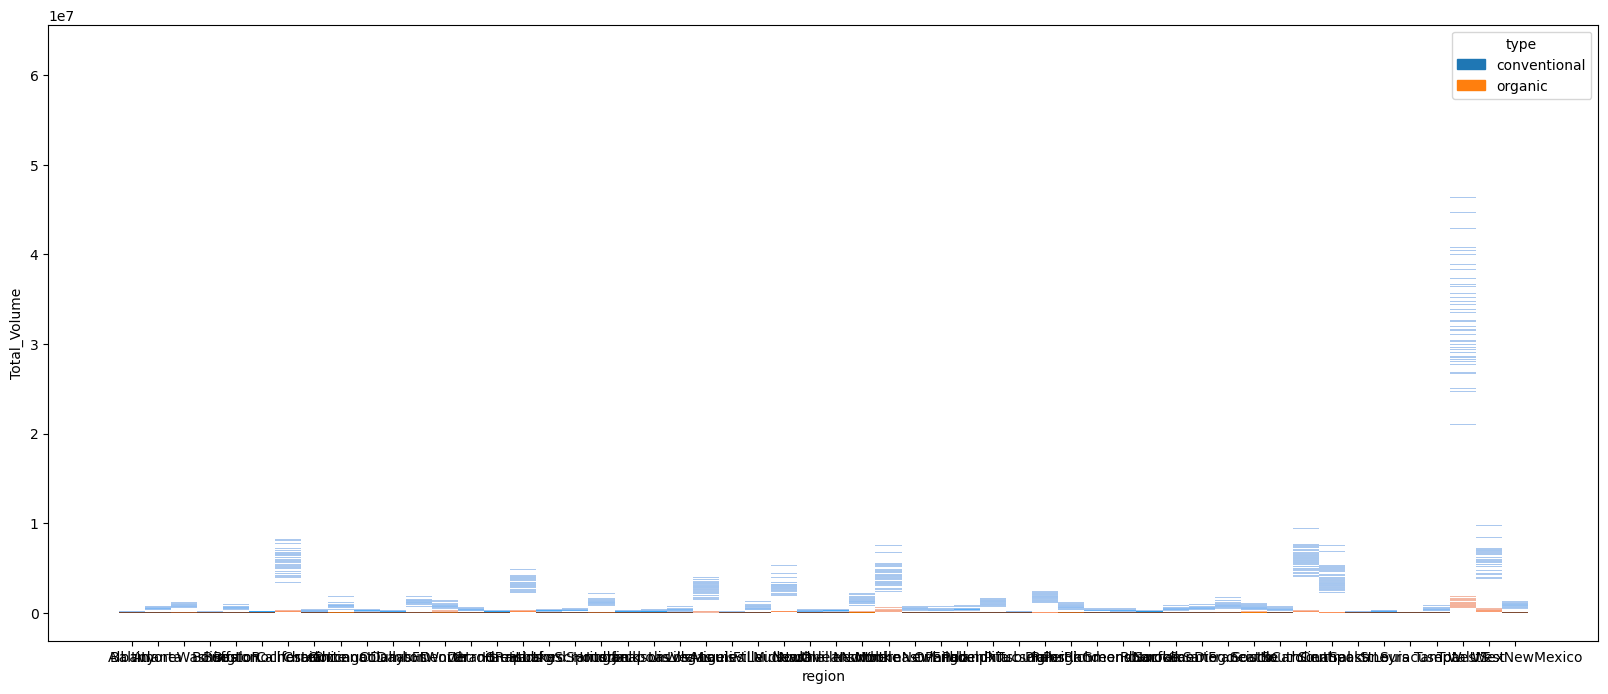

In [116]:
plt.figure(figsize=(20,8))
sns.histplot(x='region', y='Total_Volume', hue='type',data=data)
plt.show()

#### Observations:

1. volume of avocado is highest for yr 2018
2. the volume of organic avocado increased gradually w.r. to year
3. volume of avocado mainly high for the 4th to 7th day of the months
4. volume of avocado is highest for 2nd month

<Figure size 2000x1000 with 0 Axes>

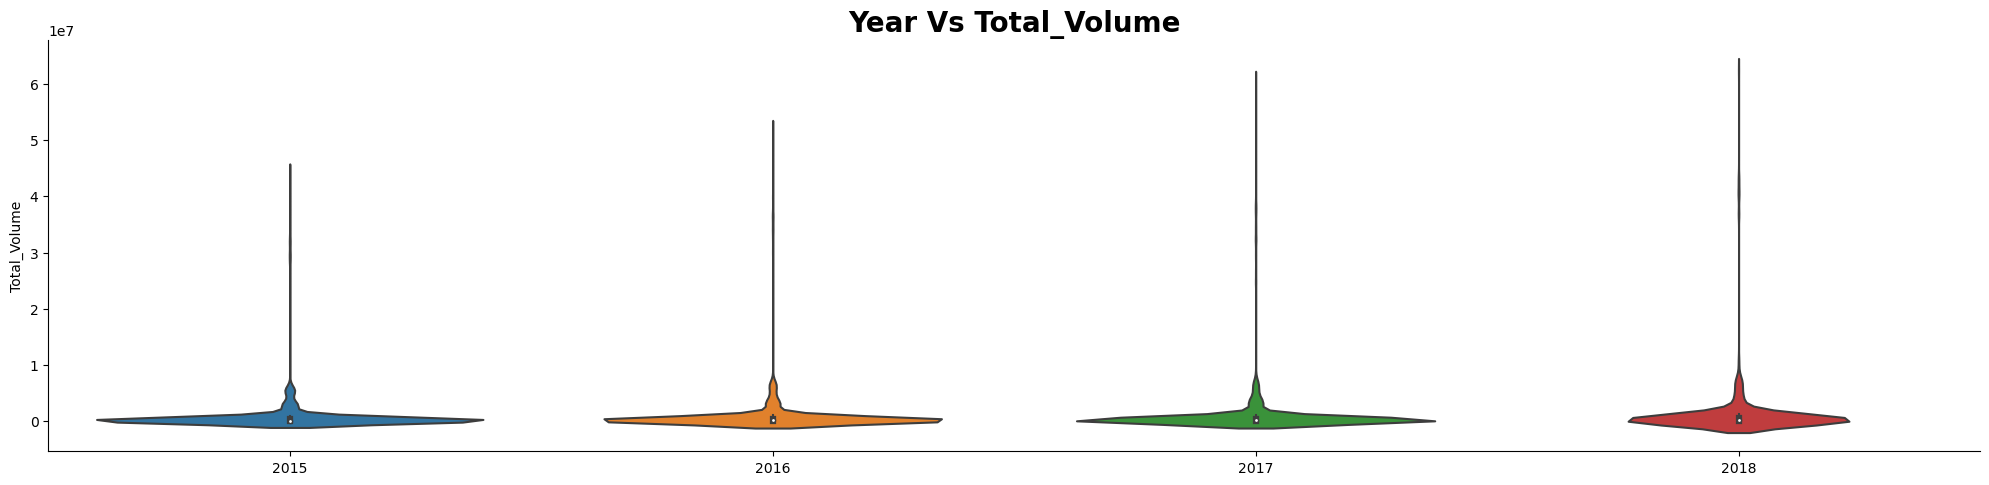

In [117]:
plt.figure(figsize =(20,10))
sns.catplot(x = 'year',y ='Total_Volume',kind = 'violin',data = data, aspect=4)
plt.xlabel("",fontsize=20)
plt.title("Year Vs Total_Volume", fontsize= 20,fontweight= "bold" )
plt.show()

<Figure size 2000x1000 with 0 Axes>

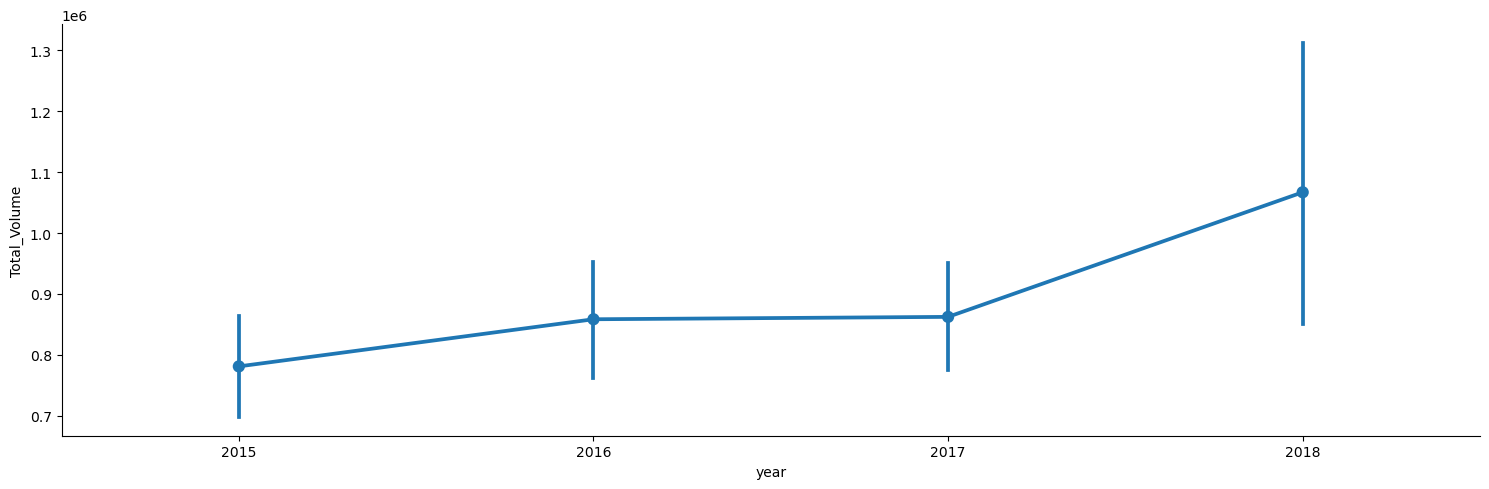

In [118]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "Total_Volume", kind ='point', data=data, aspect=3)
plt.show()

<Figure size 2000x1000 with 0 Axes>

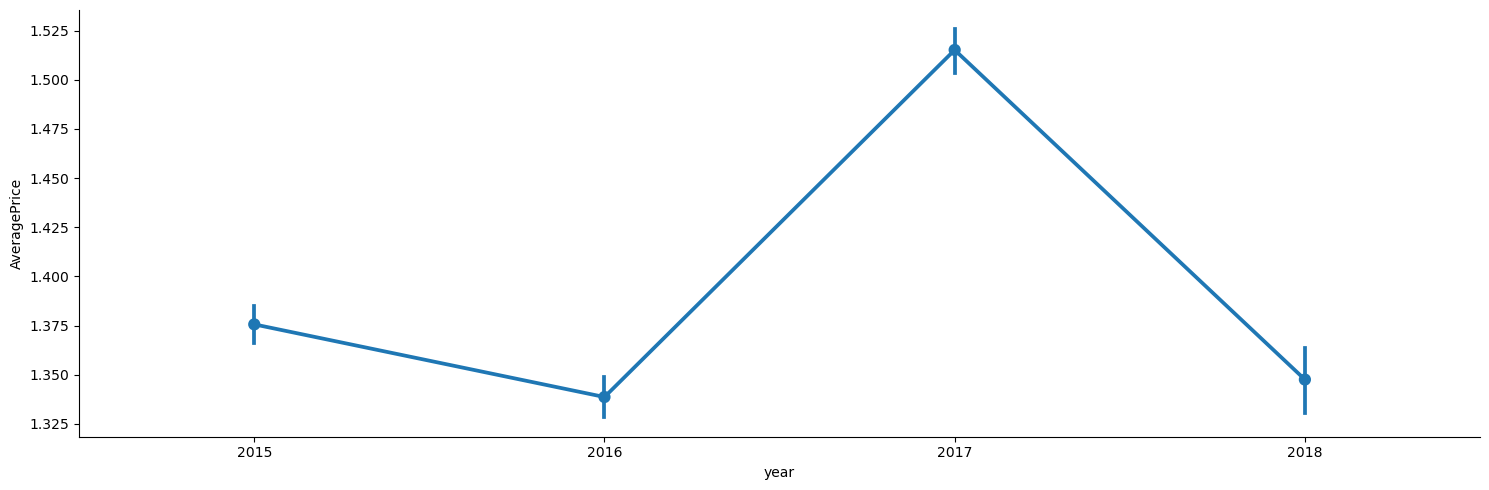

In [119]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "AveragePrice", kind ='point', data=data, aspect=3)
plt.show()

<Figure size 2000x1000 with 0 Axes>

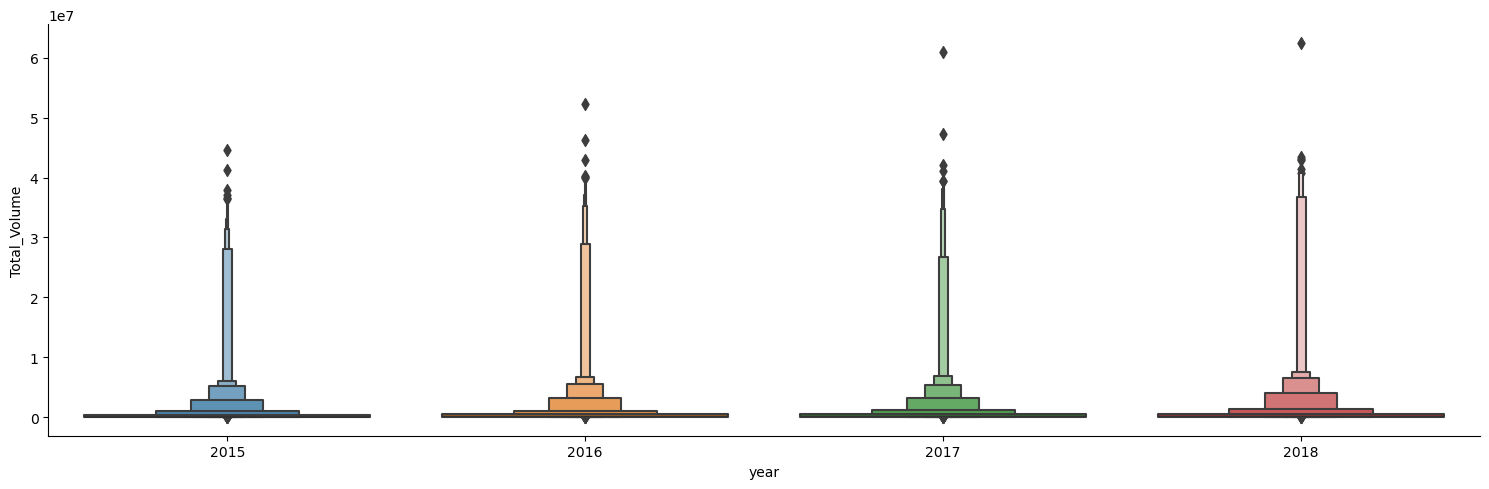

In [120]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "Total_Volume", kind ='boxen', data=data, aspect=3)
plt.show()

<Figure size 2000x1000 with 0 Axes>

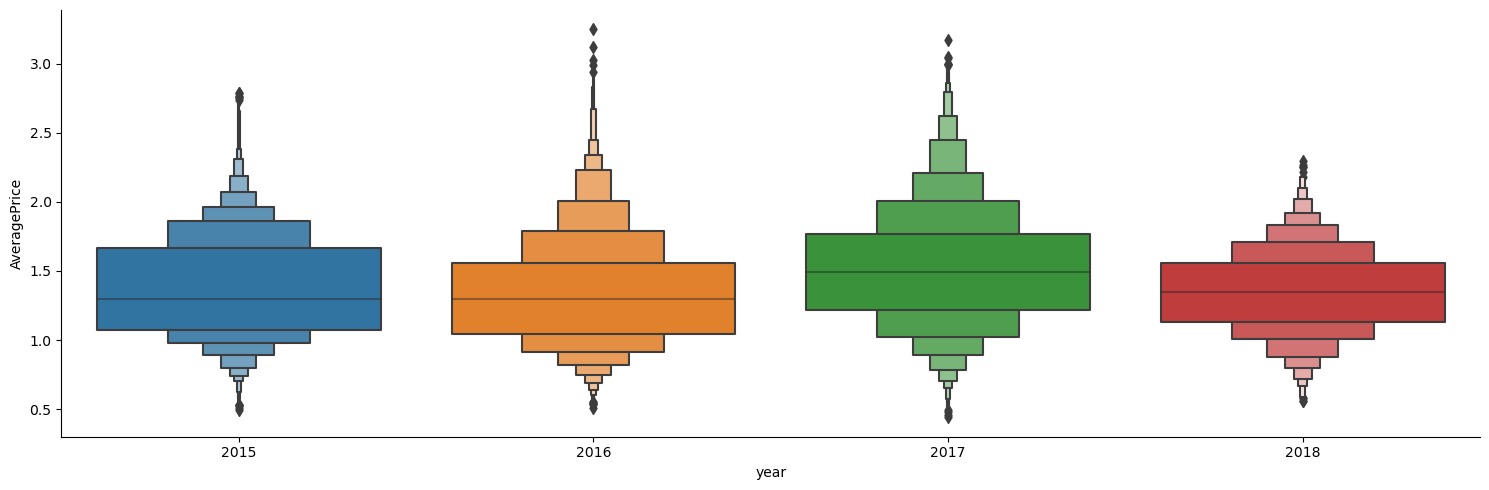

In [121]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "AveragePrice", kind ='boxen', data=data, aspect=3)
plt.show()

#### Observations:

1. Outliers are present in every years
2. the price is low for year 2018 , the sale is comparatively high
3. we can see that, sale is affected by price.

In [122]:
data.groupby(['year','type'])['AveragePrice'].agg([min,max,sum])

min   max      sum
year type                             
2015 conventional  0.49  1.59  3026.92
     organic       0.81  2.79  4697.02
2016 conventional  0.51  2.20  3104.51
     organic       0.58  3.25  4413.29
2017 conventional  0.46  2.22  3705.97
     organic       0.44  3.17  4963.59
2018 conventional  0.56  1.74   730.87
     organic       1.01  2.30  1015.53

In [123]:
data.groupby(['year','type'])['Total_Volume'].agg([min,max,sum])

min          max           sum
year type                                             
2015 conventional  35852.68  44655461.51  4.296599e+09
     organic          84.56    912681.57  8.886943e+07
2016 conventional  33699.68  52288697.89  4.690250e+09
     organic         385.55   1475457.53  1.306401e+08
2017 conventional  43715.52  61034457.10  4.766166e+09
     organic         515.01   1634877.11  1.681399e+08
2018 conventional  65757.32  62505646.52  1.334206e+09
     organic        2064.90   1814929.97  4.853227e+07

In [124]:
data.groupby(['year','type'])['Large_Bags'].agg([min,max,sum])

min         max           sum
year type                                         
2015 conventional   0.00  1371440.28  1.231692e+08
     organic        0.00   148734.45  8.897192e+06
2016 conventional   0.00  3373077.87  3.136371e+08
     organic        0.00   325375.97  2.298920e+07
2017 conventional   0.00  4324231.19  3.713655e+08
     organic        0.00   561530.39  2.797352e+07
2018 conventional  80.08  5719096.61  1.177311e+08
     organic        0.00   267818.31  5.852903e+06

In [125]:
data.groupby(['year','type'])['XLarge_Bags'].agg([min,max,sum])

min        max          sum
year type                                     
2015 conventional  0.0  199305.12   5443128.28
     organic       0.0       0.00         0.00
2016 conventional  0.0  551693.65  20038284.84
     organic       0.0       0.00         0.00
2017 conventional  0.0  377661.06  23991658.41
     organic       0.0     265.79      5513.93
2018 conventional  0.0  309467.53   7205184.07
     organic       0.0     510.41      5407.80

In [126]:
data.groupby(['year'])['XLarge_Bags'].agg([min,max,sum])

min        max          sum
year                             
2015  0.0  199305.12   5443128.28
2016  0.0  551693.65  20038284.84
2017  0.0  377661.06  23997172.34
2018  0.0  309467.53   7210591.87

#### Observations:

1. XLarge_bags sales increased rapidly in 2018 compare to 2015.
2. Large_Bags sales also increased rapidly in 2018 compare to 2015.

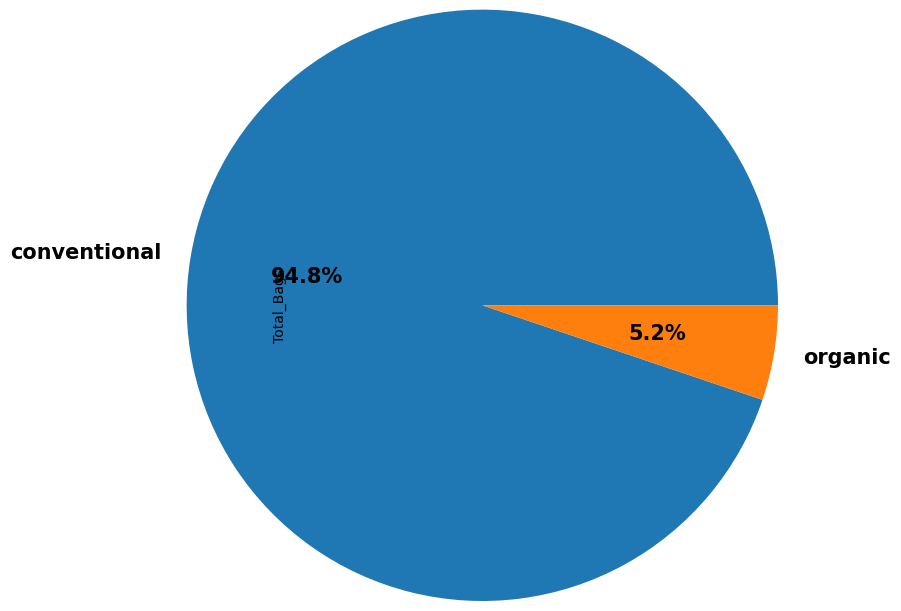

In [127]:
data.groupby('type')['Total_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

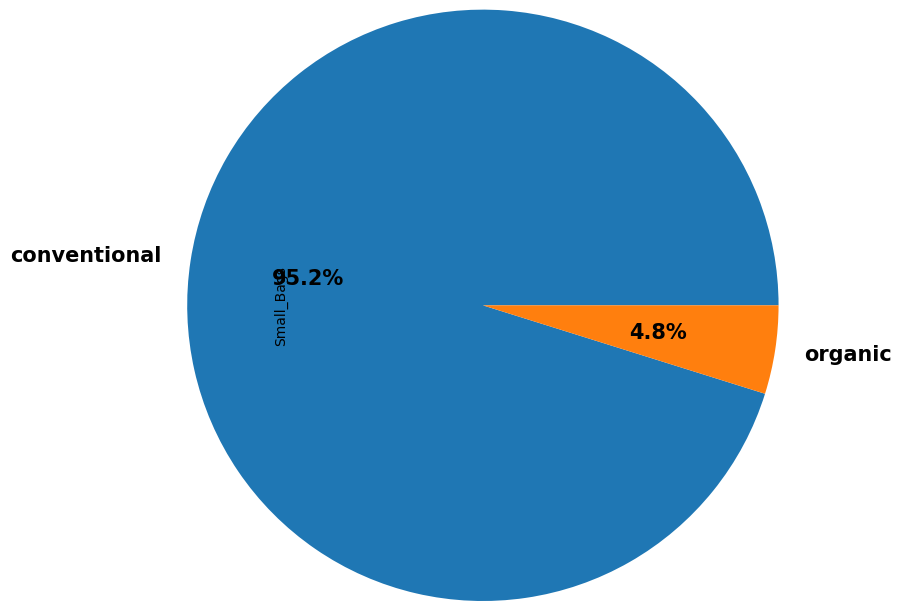

In [128]:
data.groupby('type')['Small_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

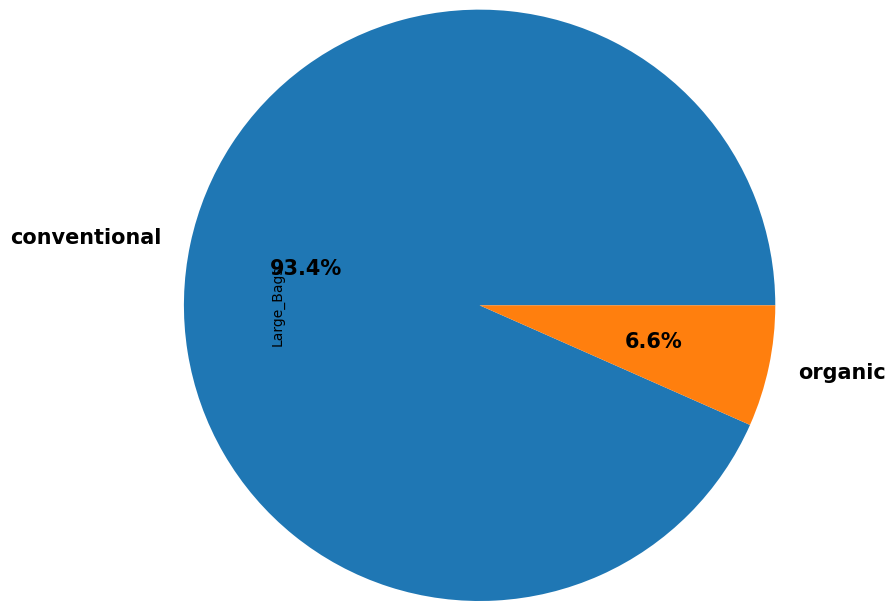

In [129]:
data.groupby('type')['Large_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

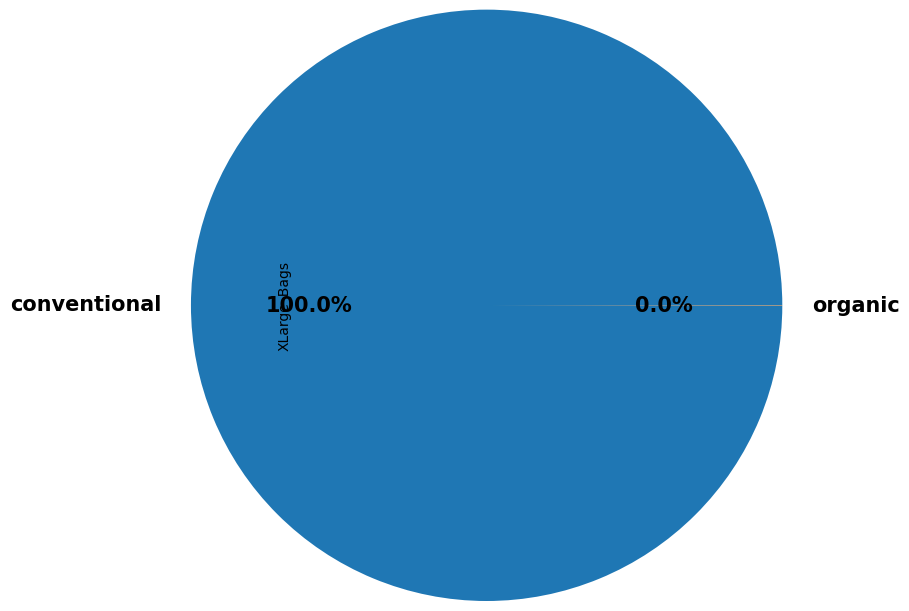

In [130]:
data.groupby('type')['XLarge_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

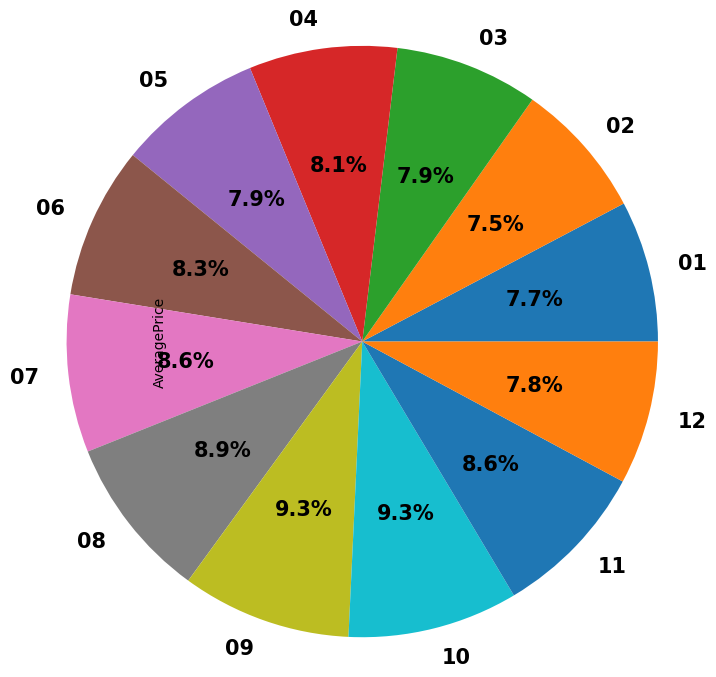

In [131]:
data.groupby('month')['AveragePrice'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

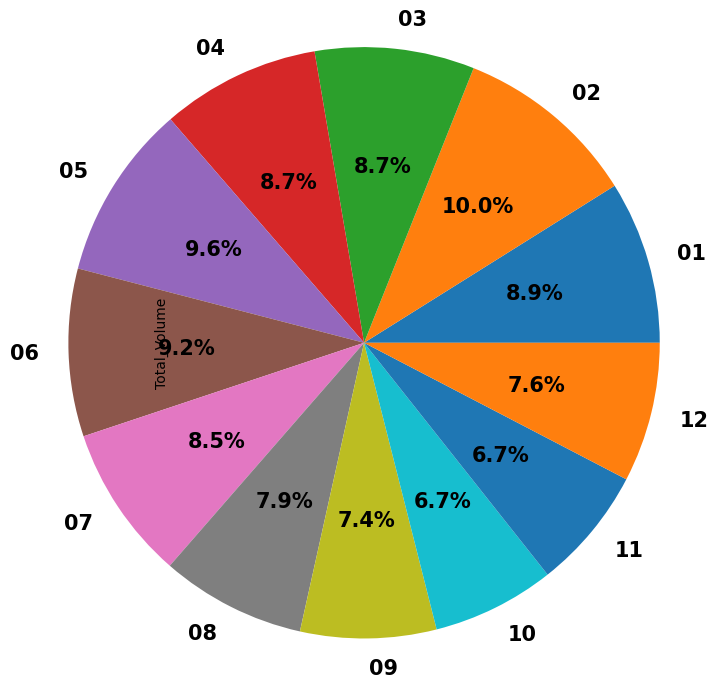

In [132]:
data.groupby('month')['Total_Volume'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

#### Observations:

1. For Total_bags the conventional avocado percentage is 94.8%
2. For Small_Bags the conventional avocado percentage is 95.2%
3. For Large_Bags the conventional avocado percentage is 93.4%
4. For XLarge_Bags the conventional avocado percentage is 100%, there is no organic avocado.
5. Mainly conventional avocado is the best selling and cheaper avocado
6. for 9th and 10th month, price is high and sale is low.

# EDA

### Univariate analysis:

In [133]:
data_new =data.copy()

In [134]:
# Creating Datframe for numeric features
data.drop(['type','region','year'], axis=1, inplace=True)

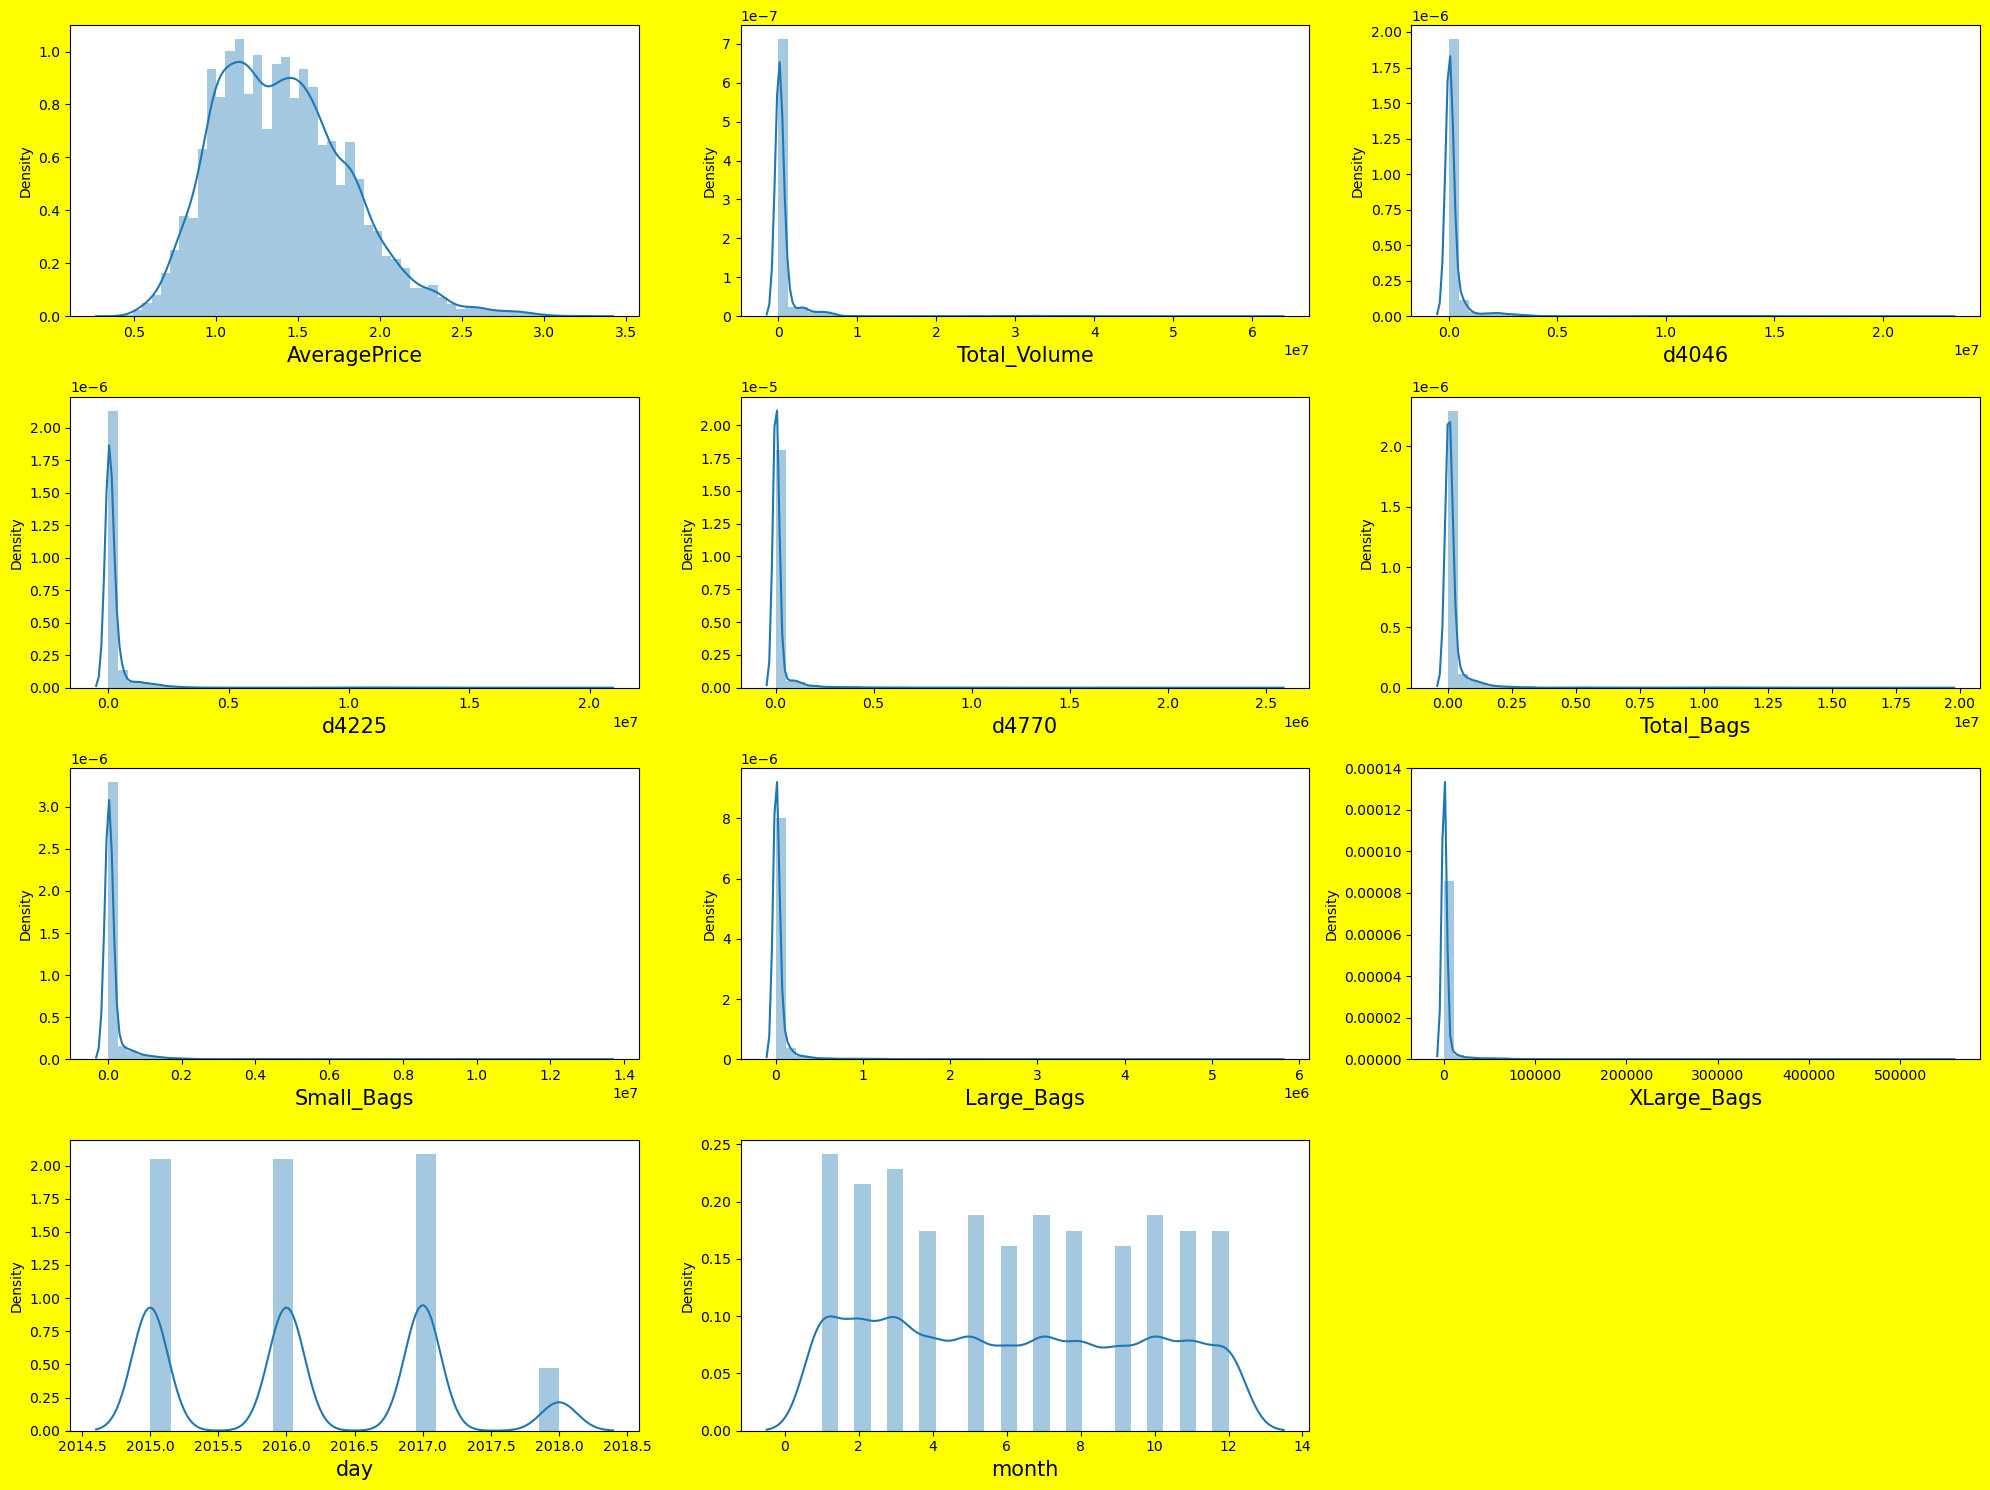

In [135]:
plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for x in data:
    if plno<=12:
        plt.subplot(4,3,plno)
        sns.distplot(data[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

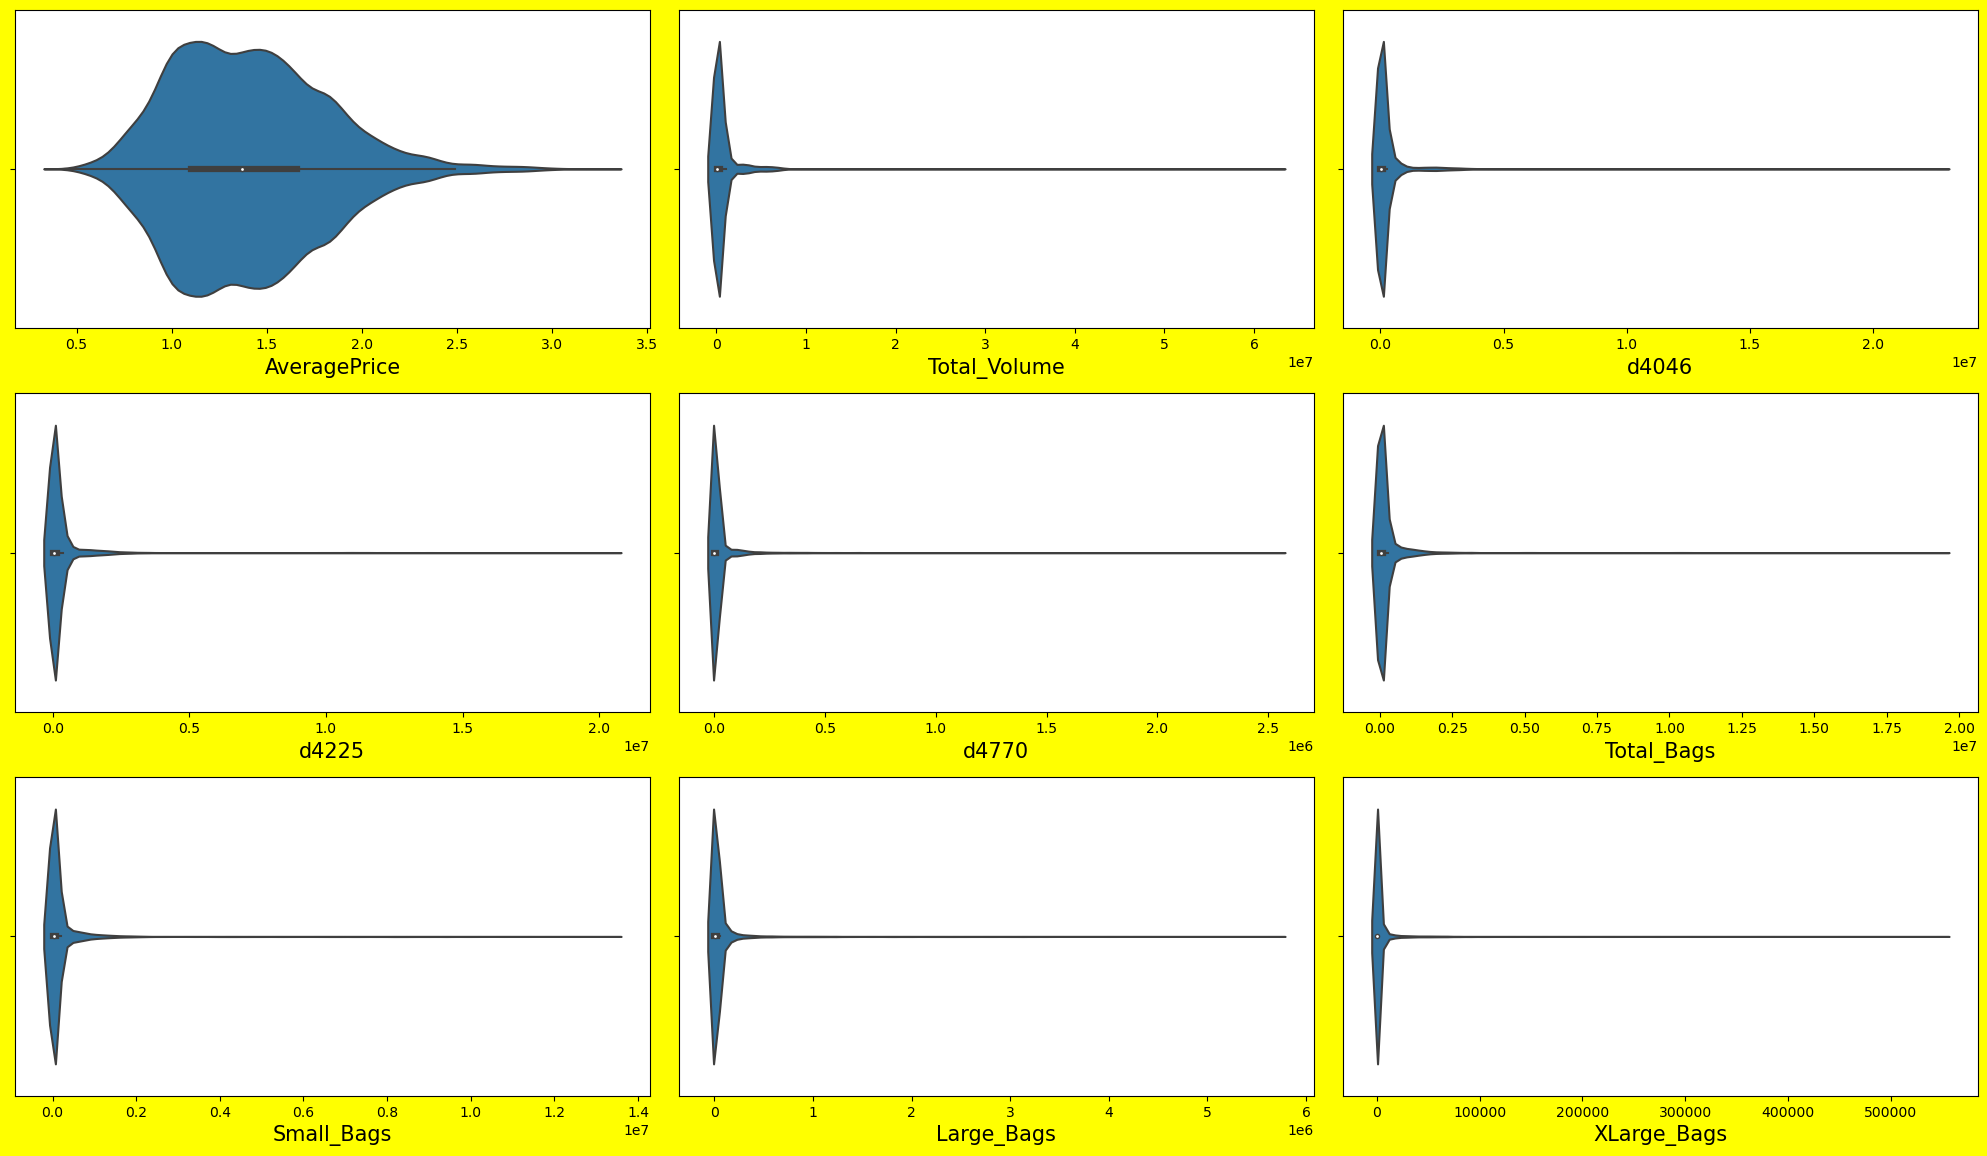

In [136]:
data_new1 =data.copy()
# Creating Datframe for numeric features
data.drop(['day','month'], axis=1, inplace=True)

plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for x in data:
    if plno<=12:
        plt.subplot(4,3,plno)
        sns.violinplot(data[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Observations:

1. Averageprice is in between 1-2
2. For every features,outliers with sharp peak is present.
3. Mainly all features are right skewed.
4. seems outliers are present

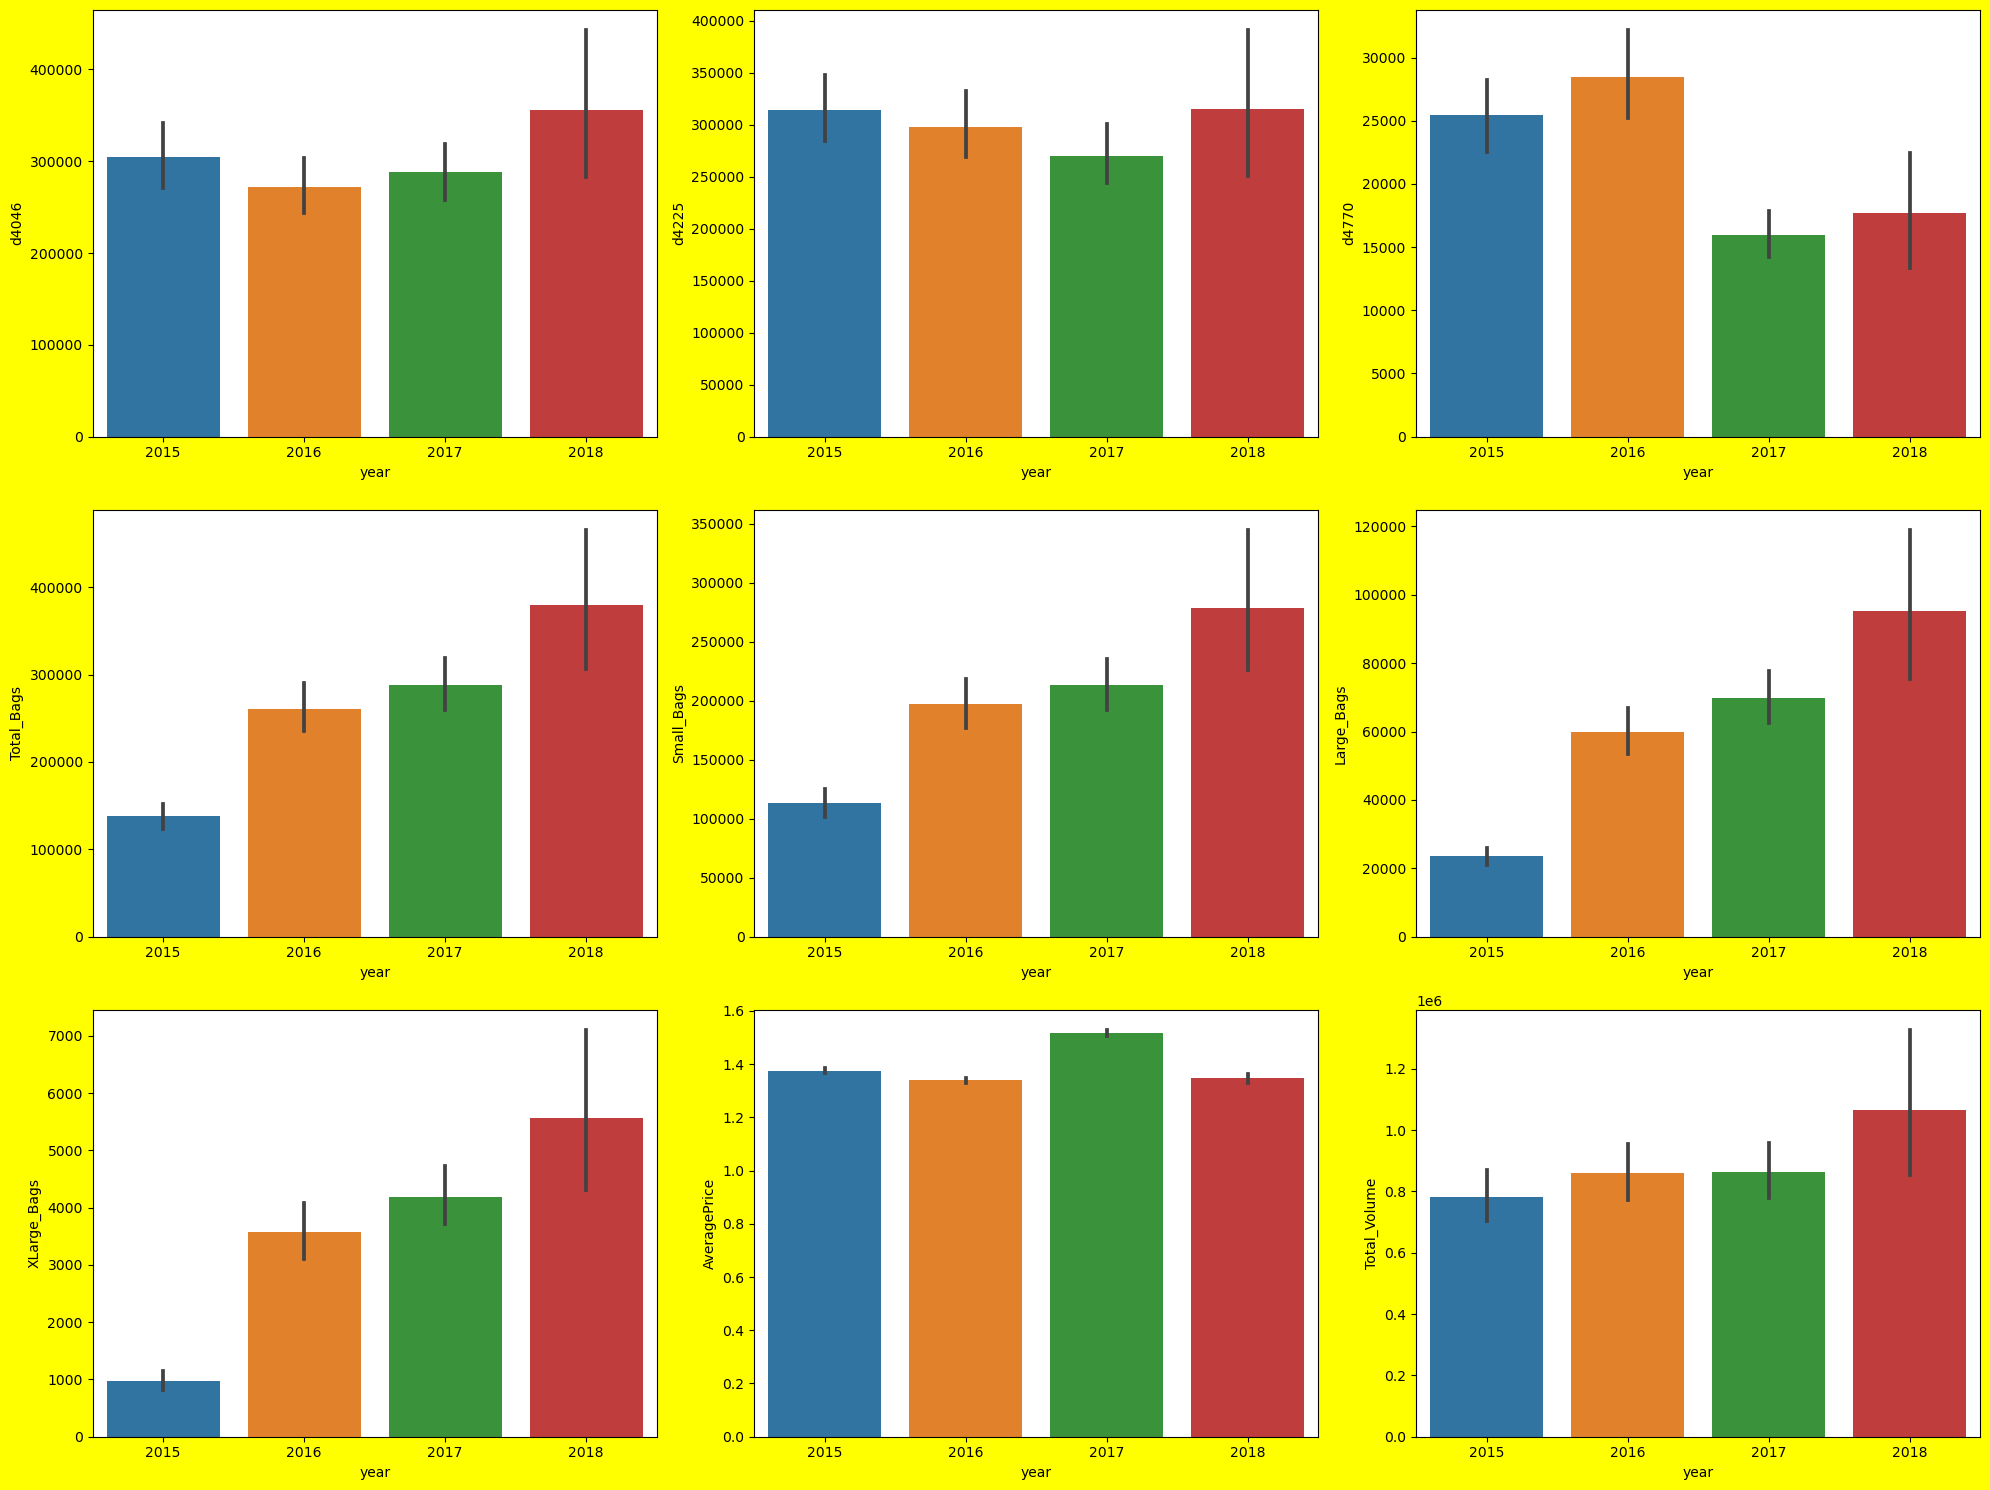

In [137]:
y = data_new[['d4046','d4225','d4770','Total_Bags','Small_Bags', 'Large_Bags', 'XLarge_Bags', 'AveragePrice', 'Total_Volume']]
x = data_new['year']

plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for i in y:
    if plno<=9:
        plt.subplot(3,3,plno)
        sns.barplot(x,y[i])
    plno +=1
plt.tight_layout()

#### Observations:

1. Sale of all 3 types of bags is increased gradually in every year and max in 2018
2. For 3 types of bags the sale of small bag is max for eveyyear.
3. For 3 types of bags the sale of XLarge bag is min for eveyyear.
4. As earlier, the price is low and the sale is high for year 2018.

### Bivariate Analysis:

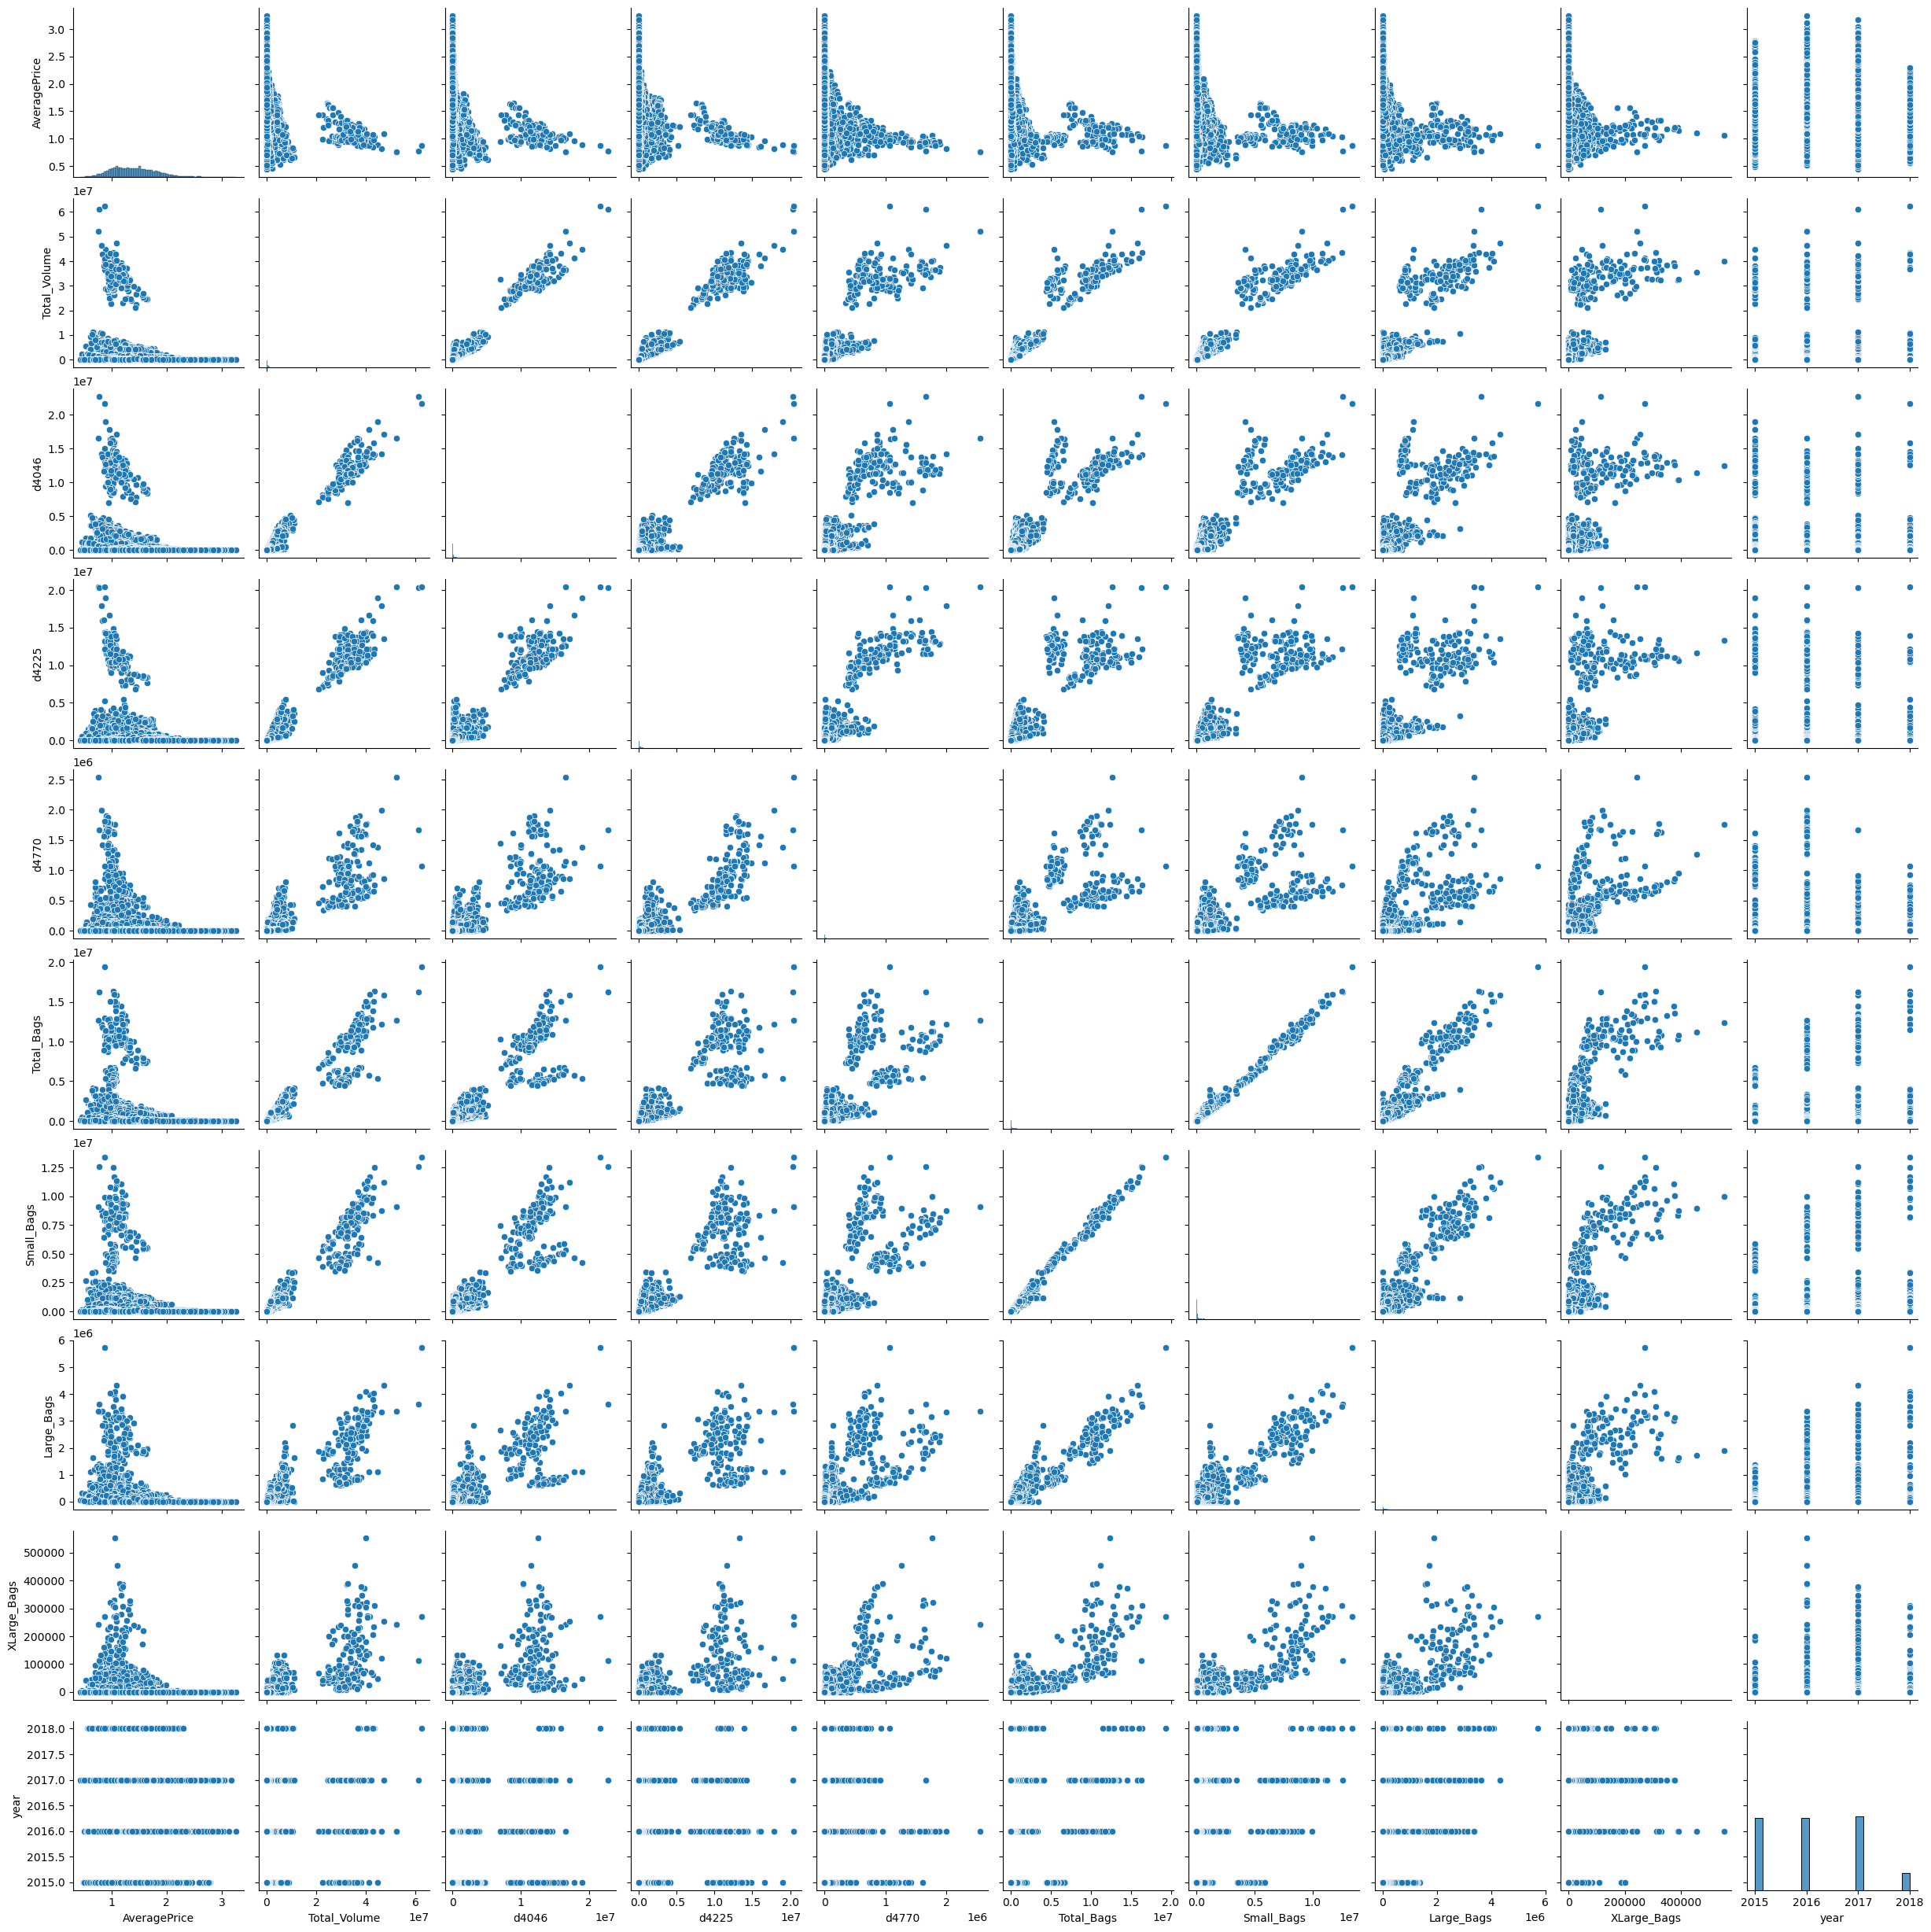

In [138]:
sns.pairplot(data_new)
plt.show()

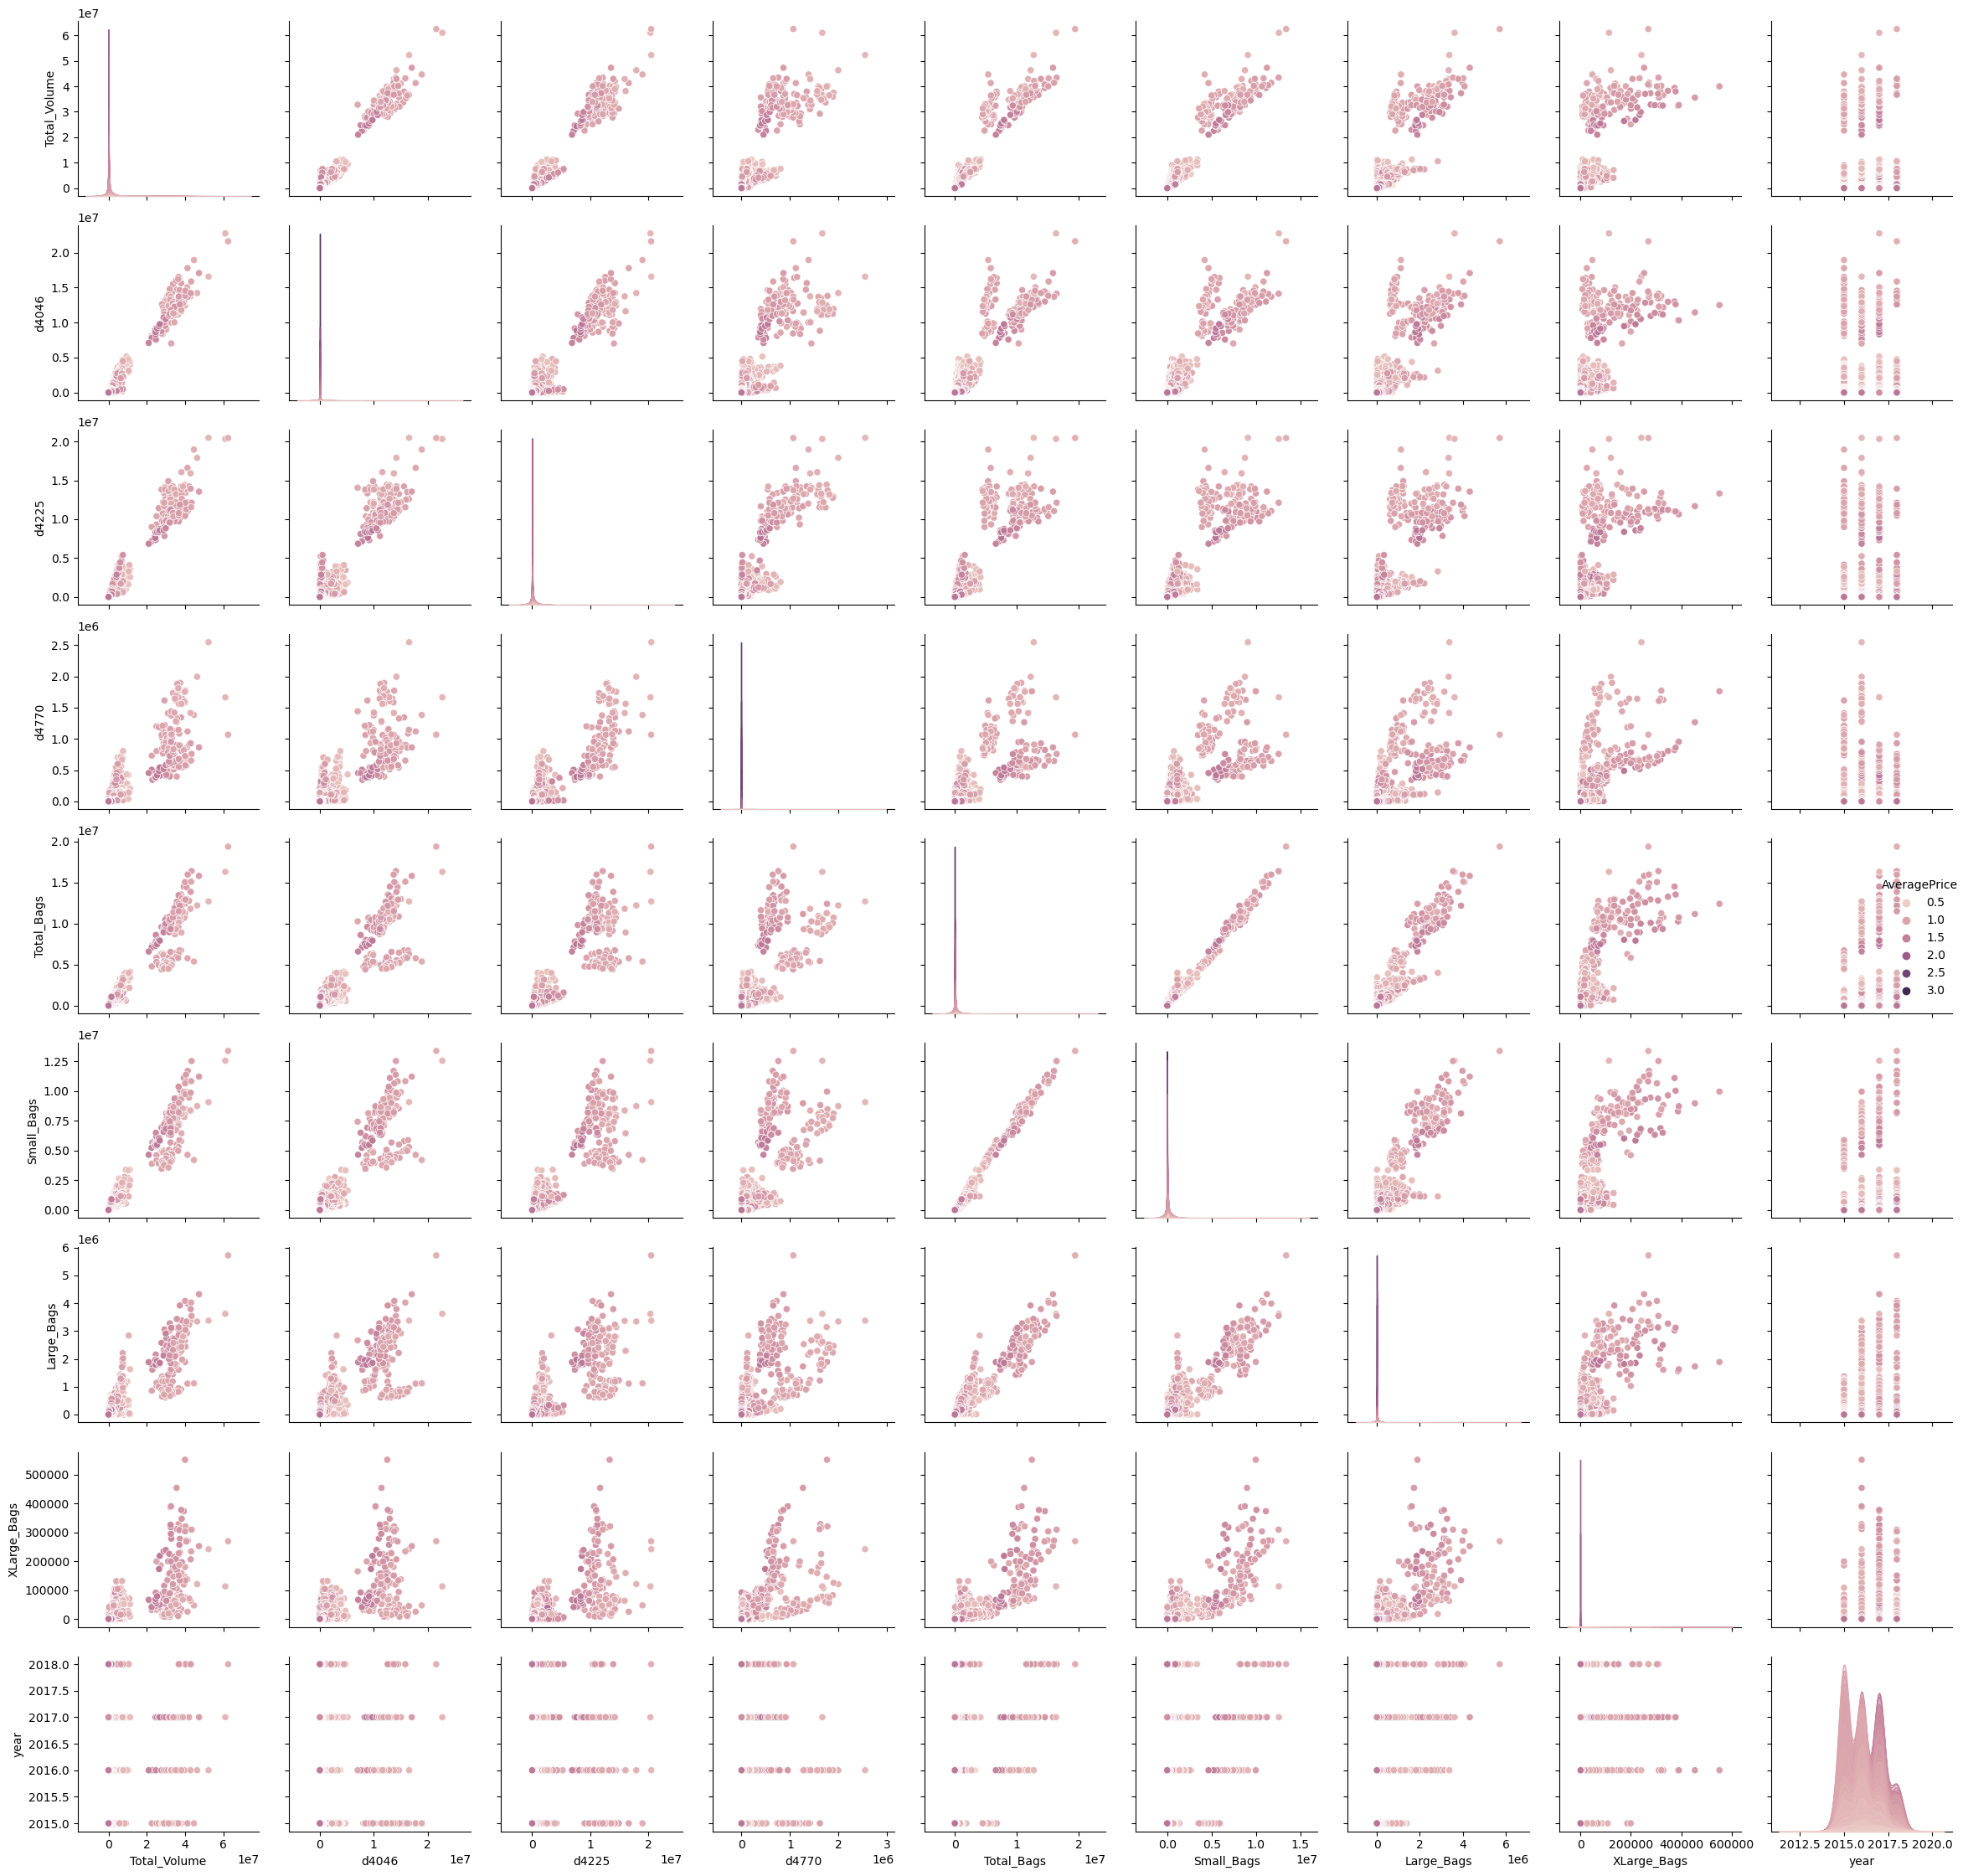

In [139]:
sns.pairplot(data_new, hue= "AveragePrice", kind= 'scatter')
plt.tight_layout()
plt.show()

### Correlations:

In [140]:
data_new.corr()

AveragePrice  Total_Volume     d4046     d4225     d4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total_Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
d4046            -0.208317      0.977863  1.000000  0.926110  0.833389   
d4225            -0.172928      0.974181  0.926110  1.000000  0.887855   
d4770            -0.179446      0.872202  0.833389  0.887855  1.000000   
Total_Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small_Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large_Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge_Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total_Bags  Small_Bags  Large_Bags  XLarge_Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total_Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
d4046           0.920057    0.925280    0.838645     0.699377  0.003353  
d4225           0.905787    0.916031    0.810015     0.688809 -0.009559  
d4770           0.792314    0.802733    0.698471     0.679861 -0.036531  
Total_Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small_Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large_Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge_Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

In [141]:
a= data_new.corr()['AveragePrice'].drop(['AveragePrice'])
a

Total_Volume   -0.192752
d4046          -0.208317
d4225          -0.172928
d4770          -0.179446
Total_Bags     -0.177088
Small_Bags     -0.174730
Large_Bags     -0.172940
XLarge_Bags    -0.117592
year            0.093197
Name: AveragePrice, dtype: float64

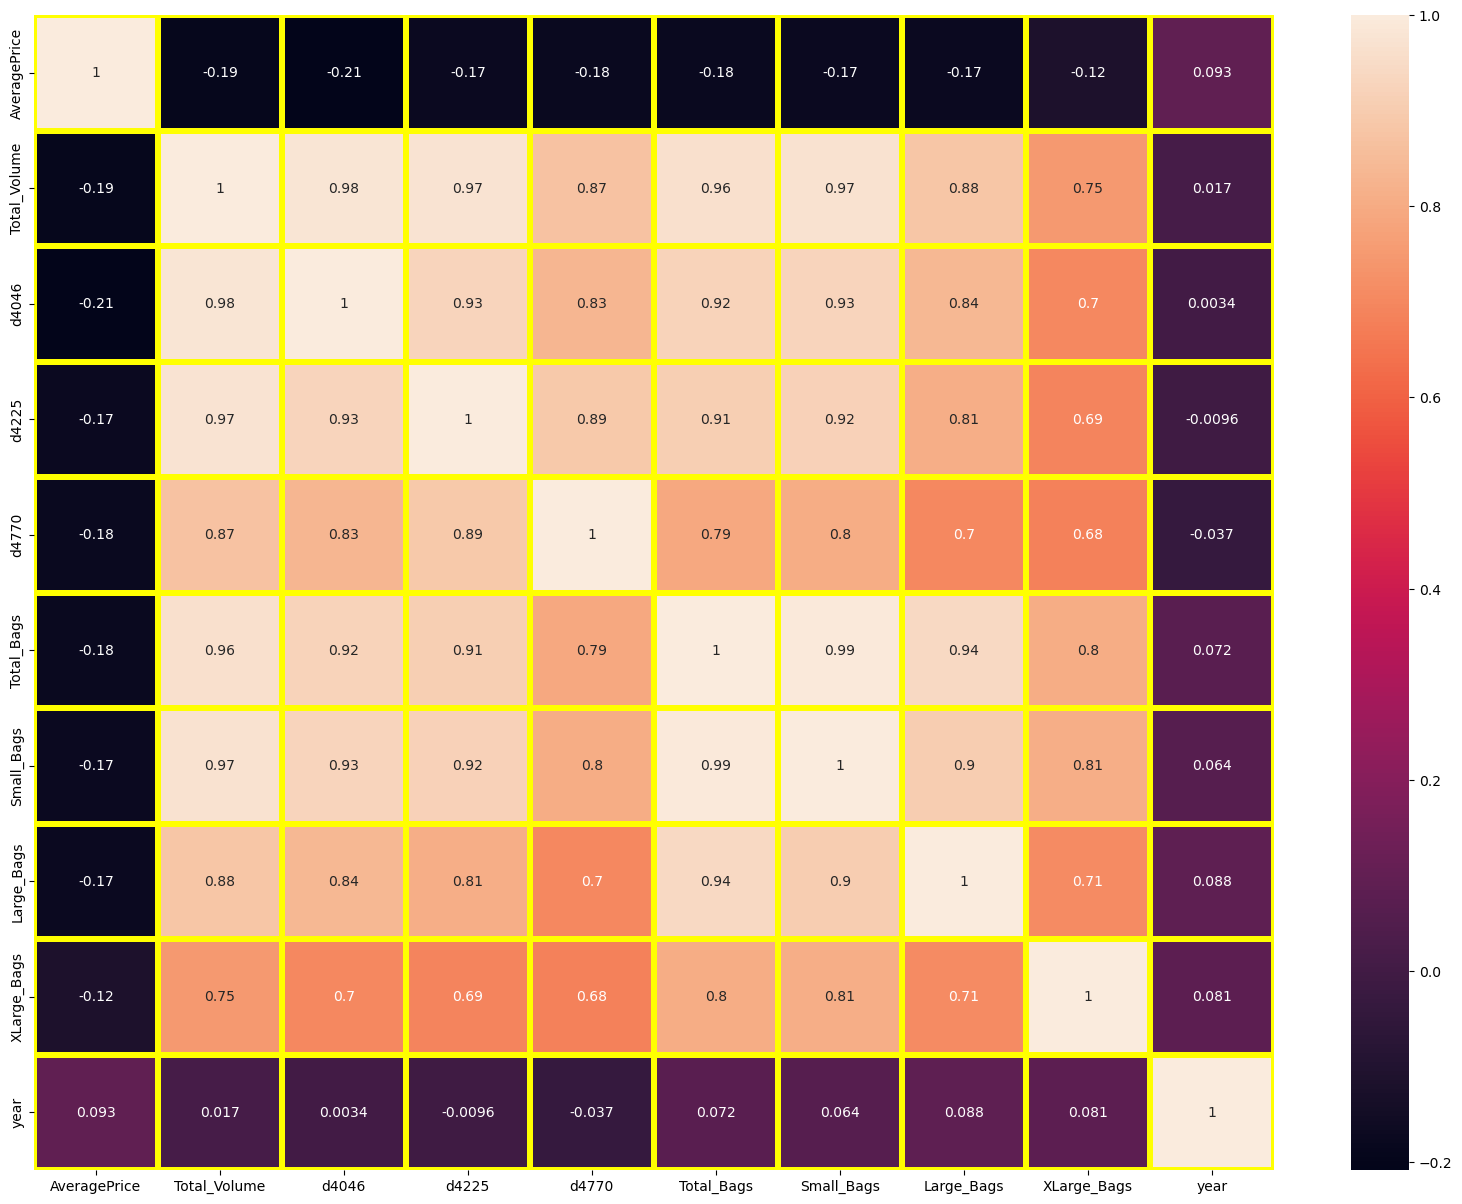

In [142]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_new.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

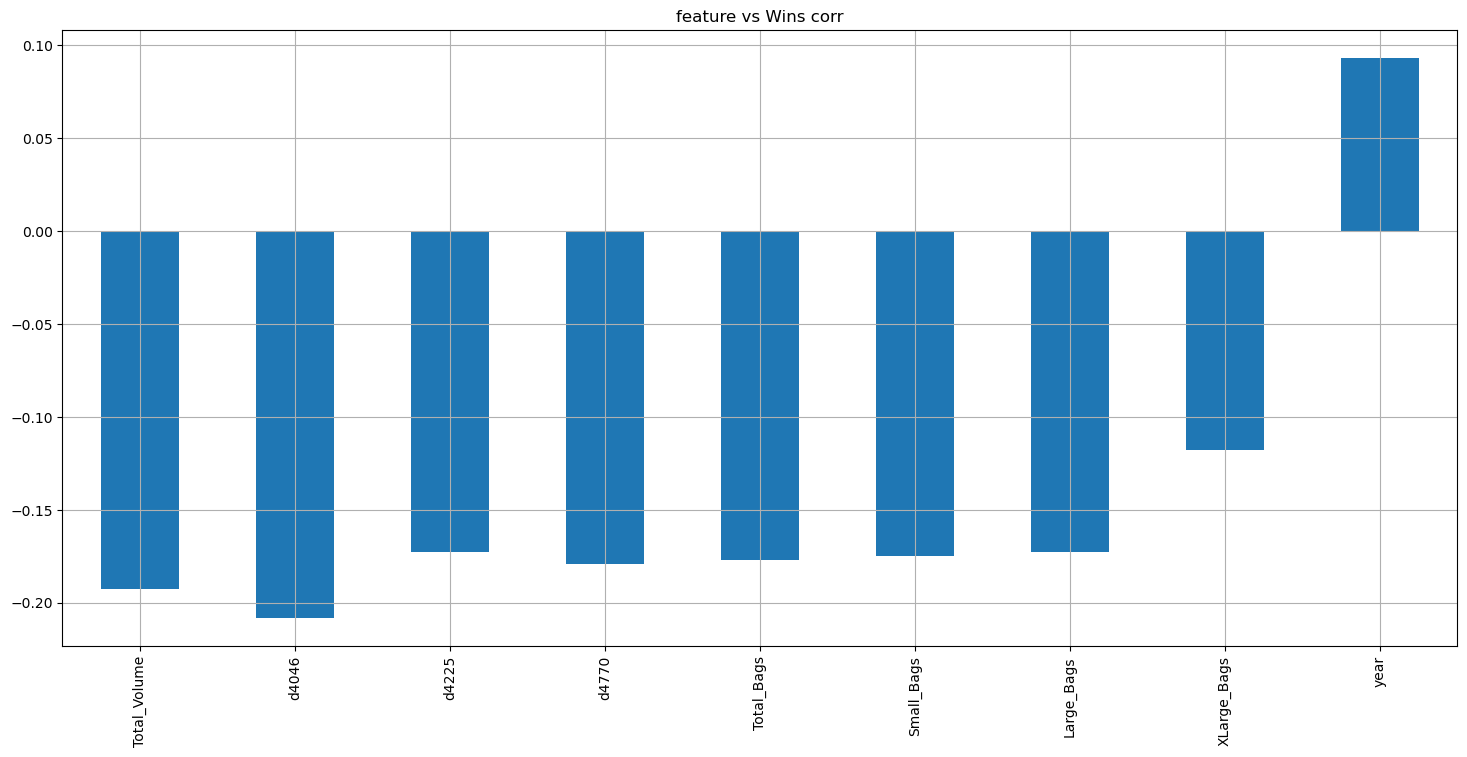

In [143]:
data_new.drop("AveragePrice", axis=1).corrwith(data_new["AveragePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

#### Observations:

1. 'd4046', 'd4225', 'd4770' are highly correlated with Total_Volume.
2. Small bags are highly correlated with Total Bags correlation coeffient 0.99, this means that most of bags are small.
3. Almost all features except year are highly negatively correlated with the target variable.

### Encoding categorical data:

In [144]:
# Using Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_new['region']=le.fit_transform(data_new['region'])
data_new['type']=le.fit_transform(data_new['type'])
data_new.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags  type  year  region   day month  
0     8603.62       93.25          0.0     0  2015       0  2015    12  
1     9408.07       97.49          0.0     0  2015       0  2015    12  
2     8042.21      103.14          0.0     0  2015       0  2015    12  
3     5677.40      133.76          0.0     0  2015       0  2015    12  
4     5986.26      197.69          0.0     0  2015       0  2015    11

In [145]:
data_new['month'] = pd.to_numeric(data_new['month'])

In [146]:
data_new['day'] = pd.to_numeric(data_new['day'])

In [147]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   d4046         18249 non-null  float64
 3   d4225         18249 non-null  float64
 4   d4770         18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  day           18249 non-null  int64  
 13  month         18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [148]:
data_new.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags  type  year  region   day  month  
0     8603.62       93.25          0.0     0  2015       0  2015     12  
1     9408.07       97.49          0.0     0  2015       0  2015     12  
2     8042.21      103.14          0.0     0  2015       0  2015     12  
3     5677.40      133.76          0.0     0  2015       0  2015     12  
4     5986.26      197.69          0.0     0  2015       0  2015     11

#### Observation:

1. day and month are converted into int from object datatype.
2. encoding of region and type is done

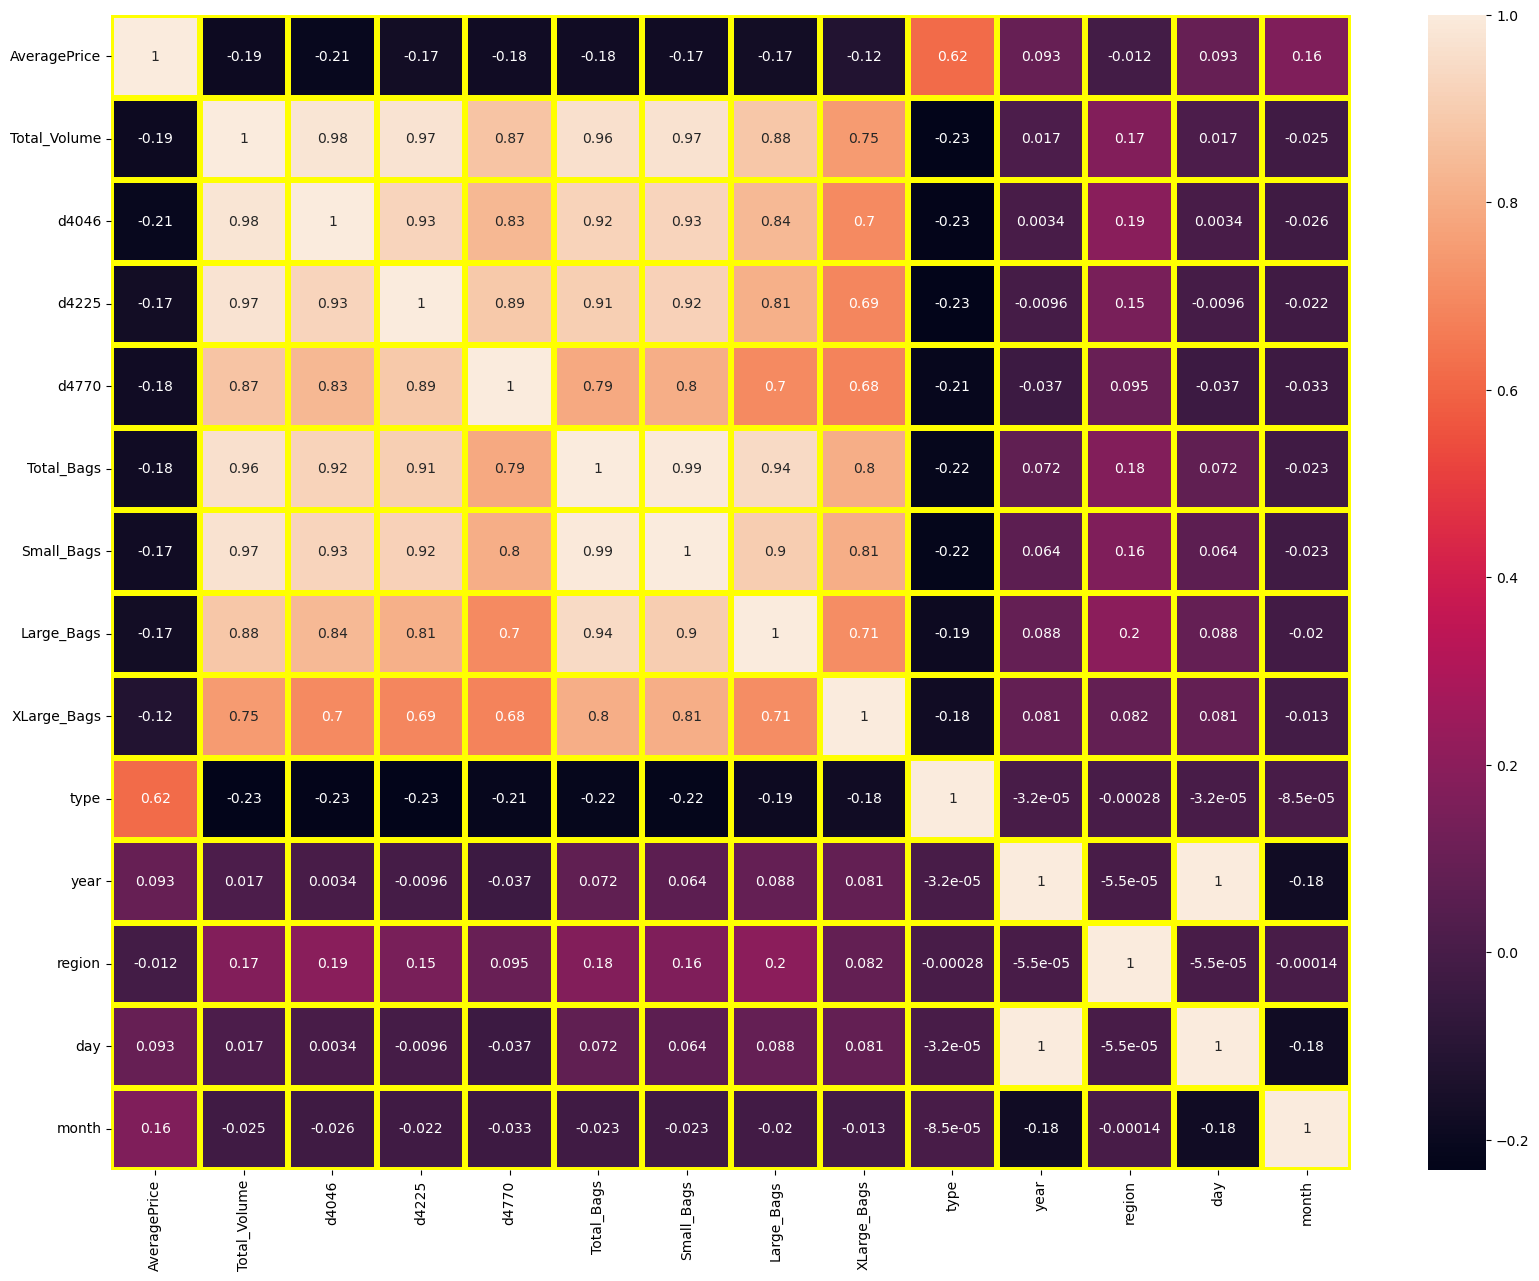

In [149]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_new.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

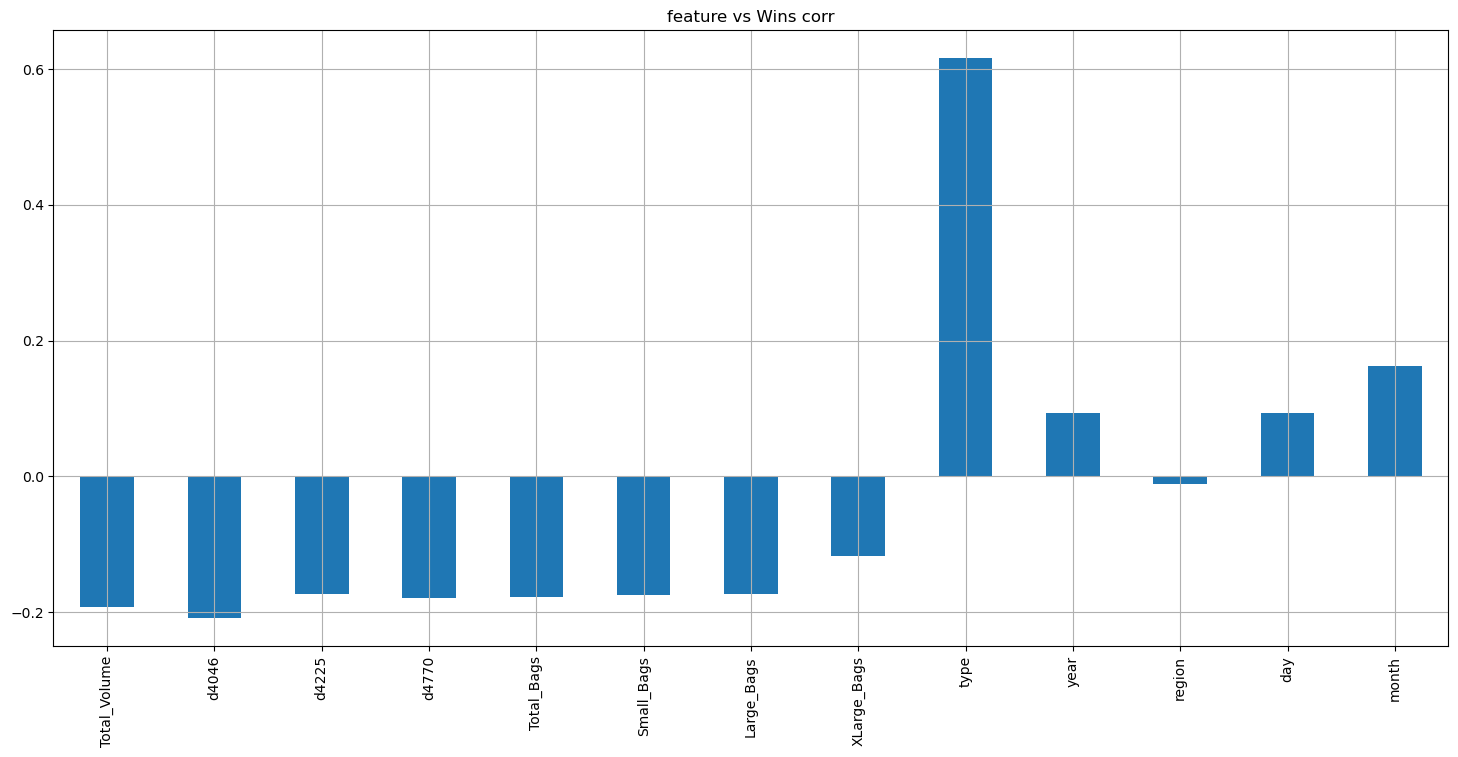

In [150]:
data_new.drop("AveragePrice", axis=1).corrwith(data_new["AveragePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

#### Observations:

After encoding type, day, months are also positively correlatd with target

### Outliers Detection and Removal:

AveragePrice       AxesSubplot(0.125,0.653529;0.133621x0.226471)
Total_Volume    AxesSubplot(0.285345,0.653529;0.133621x0.226471)
d4046            AxesSubplot(0.44569,0.653529;0.133621x0.226471)
d4225           AxesSubplot(0.606034,0.653529;0.133621x0.226471)
d4770           AxesSubplot(0.766379,0.653529;0.133621x0.226471)
Total_Bags         AxesSubplot(0.125,0.381765;0.133621x0.226471)
Small_Bags      AxesSubplot(0.285345,0.381765;0.133621x0.226471)
Large_Bags       AxesSubplot(0.44569,0.381765;0.133621x0.226471)
XLarge_Bags     AxesSubplot(0.606034,0.381765;0.133621x0.226471)
type            AxesSubplot(0.766379,0.381765;0.133621x0.226471)
year                   AxesSubplot(0.125,0.11;0.133621x0.226471)
region              AxesSubplot(0.285345,0.11;0.133621x0.226471)
day                  AxesSubplot(0.44569,0.11;0.133621x0.226471)
month               AxesSubplot(0.606034,0.11;0.133621x0.226471)
dtype: object

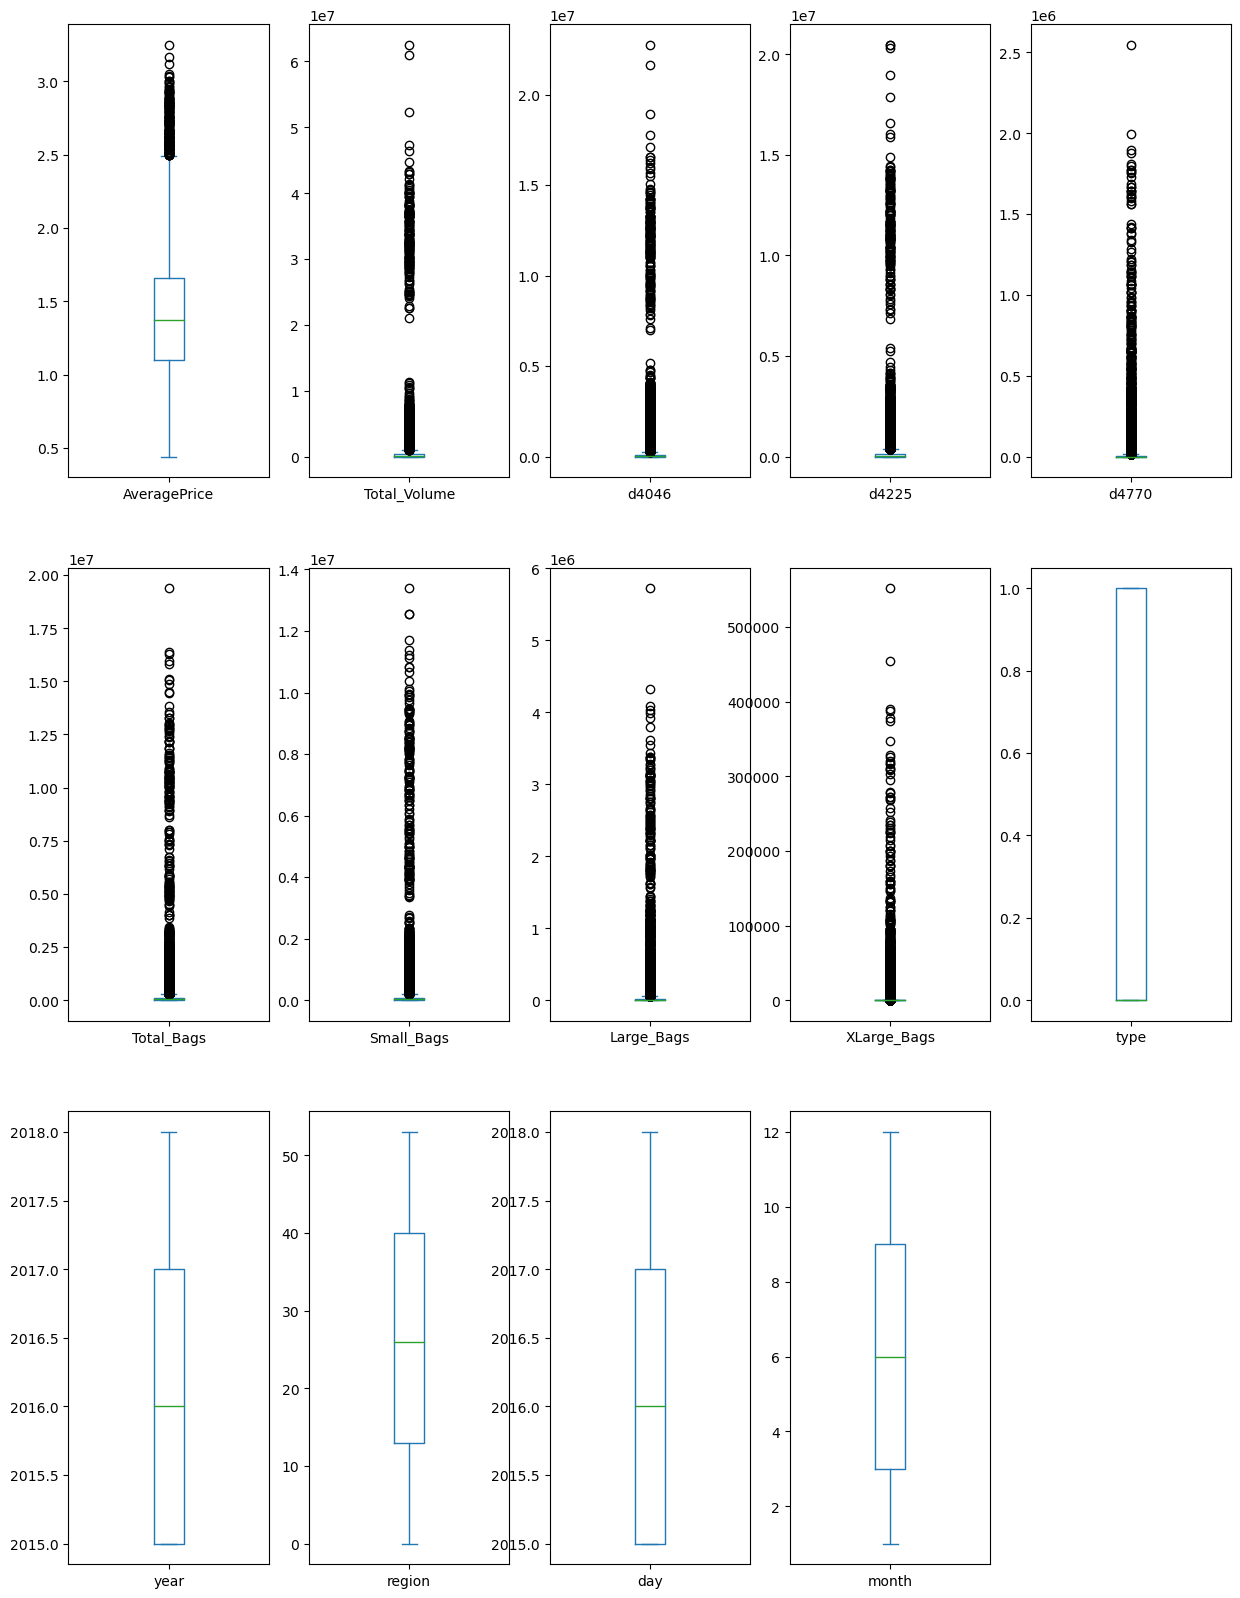

In [151]:
data_new.plot(kind ='box', subplots =True , layout =(3,5), figsize = (15,20))

From the previous Boxplot , it is seen that there is outiers in featues columns. Let's remove it.

### Using Z score method:

Let's take the Z Score =3 Any data with Z Score>3, should to be rejected

In [152]:
from scipy.stats import zscore
z = np.abs(zscore(data_new))
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [153]:
data_new1 = data_new[(z<3).all(axis = 1)]
data_new1.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags  type  year  region   day  month  
0     8603.62       93.25          0.0     0  2015       0  2015     12  
1     9408.07       97.49          0.0     0  2015       0  2015     12  
2     8042.21      103.14          0.0     0  2015       0  2015     12  
3     5677.40      133.76          0.0     0  2015       0  2015     12  
4     5986.26      197.69          0.0     0  2015       0  2015     11

In [154]:
data_new1.shape

(17651, 14)

In [155]:
data_new.shape

(18249, 14)

#### Observations:

the data loss= (18249-17651)= 598 datapoints

### Checking Multicollinearity:

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data_new1.values,i)for i in range(data_new1.shape[1])]
vif["Features"] = data_new1.columns
vif

VIF      Features
0   2.496349e+01  AveragePrice
1   4.977390e+08  Total_Volume
2   8.727658e+07         d4046
3   7.504341e+07         d4225
4   5.281424e+05         d4770
5   2.333471e+13    Total_Bags
6   1.518921e+13    Small_Bags
7   1.478286e+12    Large_Bags
8   7.092920e+09   XLarge_Bags
9   3.726944e+00          type
10           inf          year
11  4.114692e+00        region
12           inf           day
13  4.218715e+00         month

#### Observations:

Here 'd4046','d4225','d4770', 'Total_Bags' is very poorly correlated(negetive correlation) with label. Lets drop the features

In [157]:
df1= data_new1.copy()

In [158]:
df1.drop(columns=['d4046','d4225','d4770', 'Total_Bags'],axis=1, inplace=True)

In [159]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif["Features"] = df1.columns
vif

VIF      Features
0  24.367452  AveragePrice
1   7.755253  Total_Volume
2   7.710569    Small_Bags
3   1.989702    Large_Bags
4   1.707744   XLarge_Bags
5   3.649631          type
6        inf          year
7   3.986715        region
8        inf           day
9   4.212273         month

As for all feature VIF is within 10 except year. Let's drop it

In [160]:
df1.drop(columns=['year'],axis=1, inplace=True)

In [161]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif["Features"] = df1.columns
vif

VIF      Features
0  24.367452  AveragePrice
1   7.755253  Total_Volume
2   7.710569    Small_Bags
3   1.989702    Large_Bags
4   1.707744   XLarge_Bags
5   3.649631          type
6   3.986715        region
7  22.370327           day
8   4.212273         month

### Checking Skewness:

In [162]:
df1.skew()

AveragePrice    0.377432
Total_Volume    3.767138
Small_Bags      4.222706
Large_Bags      5.053434
XLarge_Bags     6.135607
type           -0.037741
region          0.012798
day             0.229976
month           0.107408
dtype: float64

#### Observations:

1. The standard range for skewness is between -0.5 to 0.5.
2. Total_Volume, Small_Bags, Large_Bags, XLarge_Bags are positively skewed in nature, need to transform.

### Let's transform all the positive skewed data using log transformation:

In [163]:
df_new= df1.copy()

In [164]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method= 'yeo-johnson')

features=['Total_Volume', 'Small_Bags', 'Large_Bags', 'XLarge_Bags']
df_new[features]= scaler.fit_transform(df_new[features].values)
df_new[features].head()

Total_Volume  Small_Bags  Large_Bags  XLarge_Bags
0     -0.075324   -0.347421   -0.781153    -0.677919
1     -0.147497   -0.311322   -0.771198    -0.677919
2      0.205556   -0.374453   -0.758523    -0.677919
3      0.019655   -0.510991   -0.699123    -0.677919
4     -0.180674   -0.490534   -0.607027    -0.677919

In [165]:
df_new.skew()

AveragePrice    0.377432
Total_Volume   -0.008642
Small_Bags     -0.024405
Large_Bags     -0.110913
XLarge_Bags     0.853758
type           -0.037741
region          0.012798
day             0.229976
month           0.107408
dtype: float64

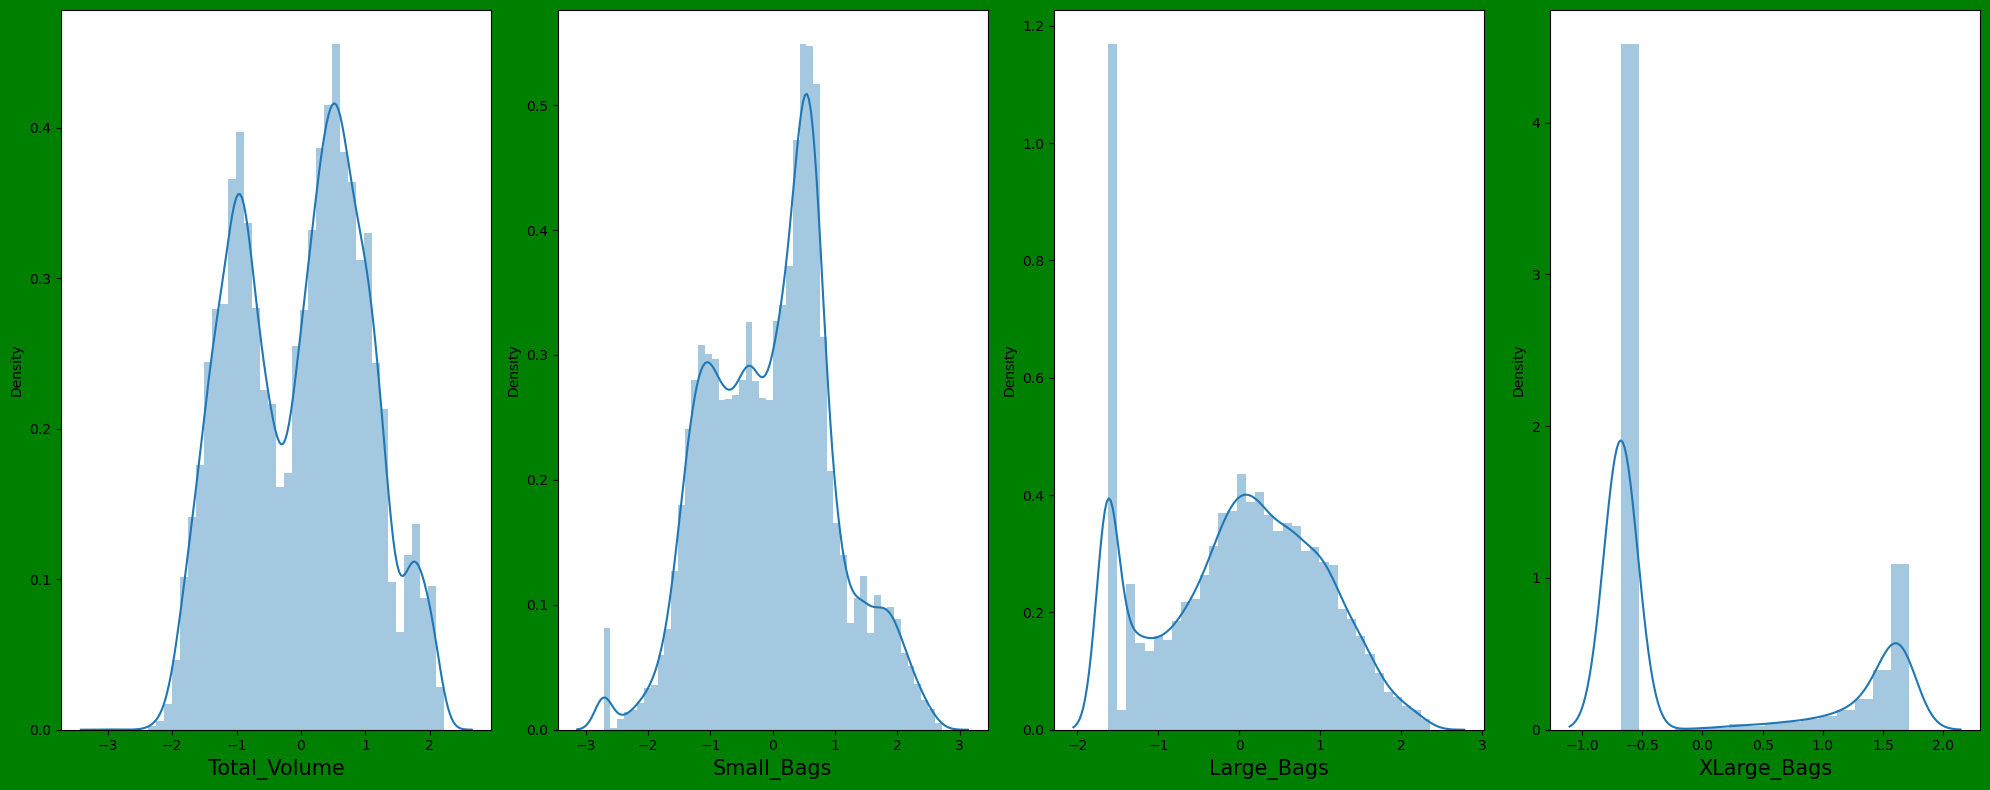

In [166]:
plt.figure(figsize=(20,8),facecolor='green')
plno=1
for x in df_new[features]:
    if plno<=4:
        plt.subplot(1,4,plno)
        sns.distplot(df_new[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Observations:

All skewness are removed from the whole dataset But, XL bags are still skewed, But its ok, let's proceed to next step

### Standard Scaling

In [167]:
x = df_new.drop('AveragePrice', axis=1)
y = df_new['AveragePrice']

In [168]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

### Final predictions using different Regression ML Models:

#### Find best Random state:

In [169]:
from sklearn.linear_model import LinearRegression

r2_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.4959716855597409 on Random_state 983


In [170]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (13238, 8)
Training target shape: (13238,)
Test feature shape: (4413, 8)
Test target shape: (4413,)


#### Observations:

For random state=983, the accuracy score is best. Lets take this random state for further steps.

### Using LinearRegression()

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=449)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.4926741794848202
Mean absolute error: 0.22124710993487826
Mean square error: 0.07703216043302016
Root mean square error: 0.2775466815384759


### Using GridSearchCV:

In [172]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [173]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.4926741794848202
Mean absolute error: 0.22124710993487826
Mean square error: 0.07703216043302016
Root mean square error: 0.2775466815384759


#### Observations:

No such improvement seen after GridSearchCV.

### Using DecisionTreeRegressor():

In [174]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7607491470463094
Mean absolute error: 0.12337638794470883
Mean square error: 0.03632775889417629
Root mean square error: 0.19059842311566036


#### Using GridSearchCV:

In [175]:
param = {'criterion' : ["squared_error", "absolute_error"],
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,3)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'squared_error', 'min_samples_leaf': 2, 'splitter': 'best'}


In [176]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7784641916179348
Mean absolute error: 0.12042601404939948
Mean square error: 0.03363791323614573
Root mean square error: 0.1834064154716125


#### Observations:

After using Grid seaech CV, R2 score is slightly increased

### Using KNeighborsRegressor():

In [177]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,18):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 0.16638884617222227
RMSE value for k=  2 is: 0.1548549609048306
RMSE value for k=  3 is: 0.1552436364253062
RMSE value for k=  4 is: 0.15577657828059788
RMSE value for k=  5 is: 0.15925265923059023
RMSE value for k=  6 is: 0.16309740695794822
RMSE value for k=  7 is: 0.16663624541428487
RMSE value for k=  8 is: 0.1706510052508743
RMSE value for k=  9 is: 0.17431131356708277
RMSE value for k=  10 is: 0.17775163637206862
RMSE value for k=  11 is: 0.18028390563905083
RMSE value for k=  12 is: 0.18417791958222374
RMSE value for k=  13 is: 0.18692169714182313
RMSE value for k=  14 is: 0.1891542430372731
RMSE value for k=  15 is: 0.19118000258453202
RMSE value for k=  16 is: 0.19315742138484152
RMSE value for k=  17 is: 0.19490576243259772
RMSE value for k=  18 is: 0.1969283764365074


In [178]:
min(rmse_val)

0.1548549609048306

#### For k=10 we get the best RMSE value for KNeighborsRegressor()

In [179]:
knn =KNeighborsRegressor(n_neighbors= 10)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7919143634933665
Mean absolute error: 0.1303942895989123
Mean square error: 0.03159564423294811
Root mean square error: 0.17775163637206862


#### Using GridSearchCV

In [180]:
param = {'algorithm' : ['auto','kd_tree', 'brute'],
             'leaf_size' : [30,40,10,],
             'n_neighbors' : [10],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'distance'}


In [181]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8348170453681383
Mean absolute error: 0.1126718892921081
Mean square error: 0.025081317266841412
Root mean square error: 0.1583708220185821


#### Observations:

After using gridsearch r2 score is slightly improved.

### Using RandomForestRegressor():

In [182]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8842810319857212
Mean absolute error: 0.09380584636301835
Mean square error: 0.017570724273736685
Root mean square error: 0.132554608647669


#### Using GridSearchCV:

In [183]:
params = {'n_estimators' : [100,150,80], 
          'min_samples_split' : [3,2,1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [184]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8832629560785461
Mean absolute error: 0.09352114208021754
Mean square error: 0.01772530853387718
Root mean square error: 0.1331364282751989


#### Observations:

r2 score, RMSE slightly improved after GridSearchCV.

### Using Support Vector Regression():

In [185]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.7120598907360969
Mean absolute error: 0.15675733618046228
Mean square error: 0.04372071713084564


In [186]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.5913770010469268
Mean absolute error: 0.19340227389791892
Mean square error: 0.06204516139156991


In [187]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.49376519994056833
Mean absolute error: 0.2199714409067712
Mean square error: 0.0768665003002527


#### Using GridSearchCV:

In [188]:
params = {'gamma':['scale', 'auto'],'C':[1.0,10, 0.1], 'kernel':['rbf']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 5)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [189]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7558044622989128
Mean absolute error: 0.14033806528213136
Mean square error: 0.03707855795337923
Root mean square error: 0.19255793401825652


#### Observations:

r2 score, RMSE are slightly improved after GridSearchCV.

### Using GradientBoostingRegressor()

In [190]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7305641255686127
Mean absolute error: 0.15496838394622298
Mean square error: 0.040911041122514036
Root mean square error: 0.20226477973812948


#### Using GridSearchCV:

In [191]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,150,80],
          'min_samples_leaf':[1,2],
         'max_features': ['auto', 'sqrt']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'loss': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 150}


In [192]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7606479015663432
Mean absolute error: 0.14535993409610384
Mean square error: 0.03634313196950676
Root mean square error: 0.19063874729316377


#### Observations:

r2 score, RMSE are improved after GridSearchCV.

### Using AdaBoostRegressor():

In [193]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5225032146812887
Mean absolute error: 0.21801369854465155
Mean square error: 0.07250293102679123
Root mean square error: 0.26926368308182824


#### Using GridSearchCV:

In [194]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.01,1] ,
        'n_estimators':[50,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'loss': 'square', 'n_estimators': 40}


In [195]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5255986894835951
Mean absolute error: 0.21824926748244222
Mean square error: 0.07203291530524666
Root mean square error: 0.26838948434178017


#### Observations:

r2 score, RMSE are slightly improved after GridSearchCV.

#### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is RandomForest().

Let's check the cross validation score before final prediction.

### Cross Validation:

In [196]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , grid_rf_best , grid_svr_best, grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [-0.2996504   0.08658035  0.41435954  0.08988726  0.11807399]

Mean CV Score : 0.08185014789203689

Std deviation : 0.2269380109296971

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(min_samples_leaf=2)

 Cross Validation Score :  [-0.94905625  0.03289051  0.05957889 -0.24290815 -0.15677478]

Mean CV Score : -0.25125395727470995

Std deviation : 0.3669548040185392

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=10, weights='distance')

 Cross Validation Score :  [-0.52268707  0.16200453  0.28659658 -0.03728859 -0.10630528]

Mean CV Score : -0.04353596826446928

Std deviation : 0.2774163623652004

-----------
-----------
Cross Validation Score of : RandomForestRegressor()

 Cross Validation Score :  [-0.42781973  0.41493784  0.4048702   0.1751879   0.07829311]

Mean CV Score : 0.1290938638433339

Std deviation : 0.3074467407510222

-----------
------

### Checking overfitting problem:

In [197]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha 

0.00023281198461601302

In [198]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.4927241205056001


In [199]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.0031

In [200]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.49267417512560885


#### Observations:

After using LASSO() and Ridge(), there is no large change in score. So this model is not OVERFITTED.

### Conclusion:

#### Our final model is RandomForestRegressor() for this particular dataset


### Final Model:

In [201]:
y_pred = grid_rf_best.predict(x_test)
y_pred

array([1.7964, 1.0086, 1.6982, ..., 0.9408, 2.1455, 1.0171])

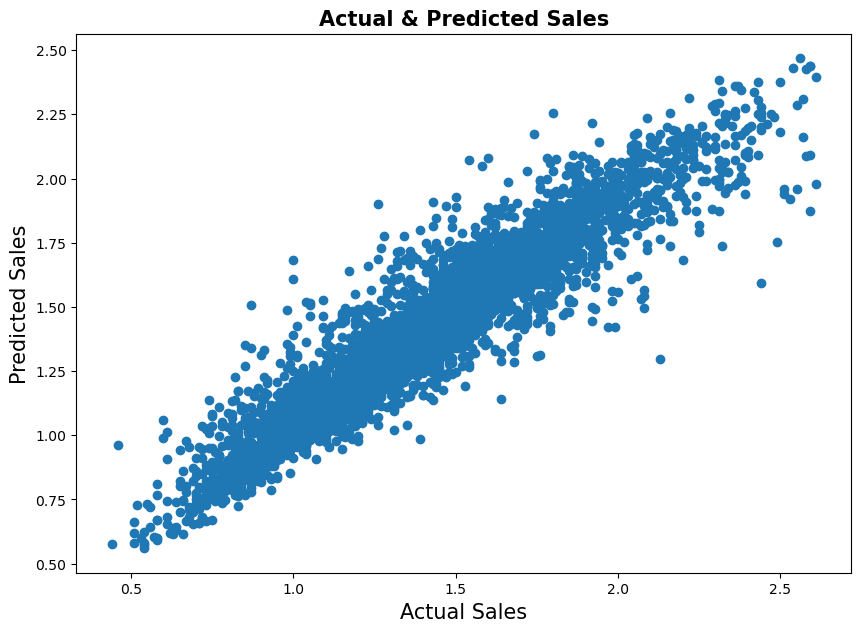

In [202]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", fontsize= 15)
plt.ylabel("Predicted Sales",fontsize= 15)
plt.title("Actual & Predicted Sales" , fontsize= 15, fontweight= 'bold')
plt.show()

In [203]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.8832629560785461

Final Mean absolute error: 0.09352114208021754

Final Mean square error: 0.01772530853387718

Final Root mean square error: 0.1331364282751989


### Best contributing features among all features:

In [204]:
features= ['Total_Volume', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'region', 'day', 'month']
features

['Total_Volume',
 'Small_Bags',
 'Large_Bags',
 'XLarge_Bags',
 'type',
 'region',
 'day',
 'month']

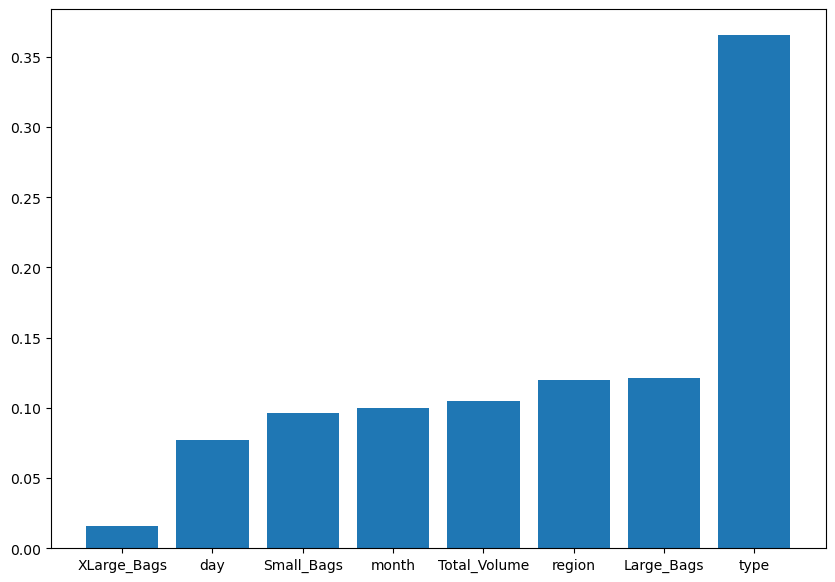

In [205]:
fimp = list(zip(features,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.bar([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

#### Observations:

The best contributing feature name is 'type'

### Load and save the model

Now , let's save the model for future use.

In [206]:
import pickle
pickle.dump(grid_rf_best, open("Avocado_Price_model", "wb"))
load_Avocado_Price_model= pickle.load(open("Avocado_Price_model", "rb"))

In [207]:
y_pred = load_Avocado_Price_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

Predicted Values  Actual Values
3179            1.2607           1.28
1360            1.1212           1.13
2161            1.0816           1.02
3786            1.8959           1.86
2842            1.1949           1.04
3338            1.4598           1.20